# Hierarchical GANs for morphological and geometric trees

## Imports

In [1]:
import numpy as np

# Keras
from keras.models import Sequential
from keras.layers.core import Dense, Reshape, Dropout, Activation
from keras.layers import Input, merge
from keras.models import Model
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM

# Other
import matplotlib.pyplot as plt
from copy import deepcopy
import os
import pickle

%matplotlib inline

# Local
import McNeuron
import models2 as models
import train2 as train
import batch_utils
import data_transforms

Using Theano backend.


## Example neuron

/Users/pavanramkumar/anaconda2/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


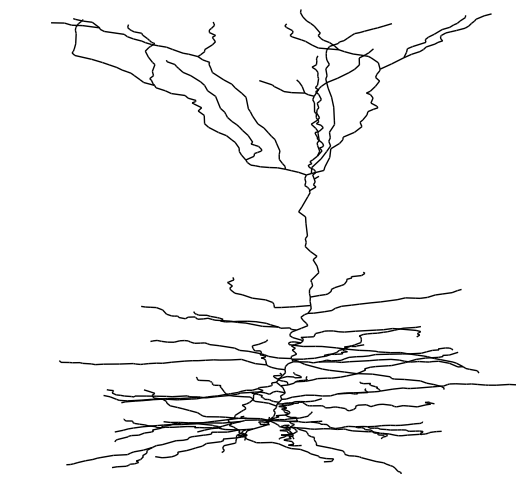

In [2]:
neuron_list = McNeuron.visualize.get_all_path(os.getcwd()+"/Data/Pyramidal/chen")
neuron = McNeuron.Neuron(file_format = 'swc', input_file=neuron_list[50])
McNeuron.visualize.plot_2D(neuron)

## Training

### Load Data

In [3]:
training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/synthetic_Two_segment_model_Different_directions_Parent_distance_n20_parent_id.p", "rb"))
#training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/train4.p", "rb"))

In [4]:
print training_data['morphology']['n20'].shape
print training_data['geometry']['n20'].shape

(50000, 19)
(50000, 19, 3)


In [5]:
import data_transforms
v = np.zeros([training_data['morphology']['n40'].shape[0],39])
for i in range(training_data['morphology']['n40'].shape[0]):
    a = data_transforms.decode_prufer(list(training_data['morphology']['n40'][i,:]))
    a = np.array(a)
    v[i,:] = a[1:]
training_data['morphology']['n40'] = v

KeyError: 'n40'

### Global parameters

In [5]:
n_levels = 1
n_nodes = [20]

input_dim = 100

n_epochs = 5
batch_size = 16
n_batch_per_epoch = np.floor(training_data['morphology']['n20'].shape[0]/batch_size).astype(int)
d_iters = 100
lr_discriminator =  0.001
lr_generator = 0.001
train_loss = 'wasserstein_loss'

rule = 'none'
train_one_by_one = False
weight_constraint = [-0.03, 0.03]

### Run

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 19, 3)         0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 19, 20)        0                                            
____________________________________________________________________________________________________
merge_1 (Merge)                  (None, 19, 23)        0           input_1[0][0]                    
                                                                   input_2[0][0]                    
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 20, 46)        0           merge_1[0][0]           

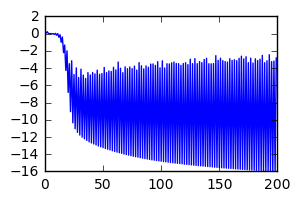

    After 100 iterations
        Discriminator Loss                         = -0.556027293205
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.521563231945
3


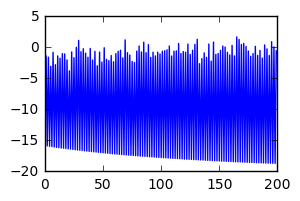

    After 100 iterations
        Discriminator Loss                         = 4.75589370728
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.79300546646
4


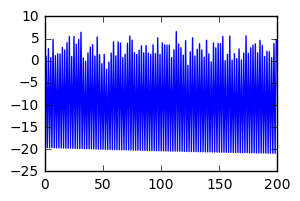

    After 100 iterations
        Discriminator Loss                         = 5.41074228287
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.652753472328
5


    After 100 iterations
        Discriminator Loss                         = 3.87452411652
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.69725084305
6


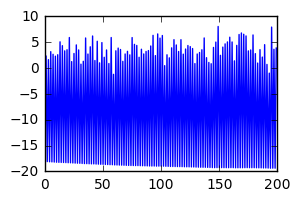

    After 100 iterations
        Discriminator Loss                         = 4.84858083725
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.56119143963
7


    After 100 iterations
        Discriminator Loss                         = 7.57261419296
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.48958492279
8


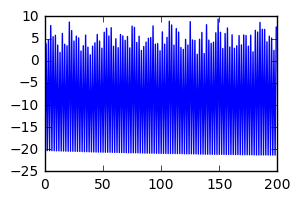

    After 100 iterations
        Discriminator Loss                         = 4.30487632751
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.01820063591
9


    After 100 iterations
        Discriminator Loss                         = 3.94966745377
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -7.04789161682
10


    After 100 iterations
        Discriminator Loss                         = 5.85452413559
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.56773662567
11


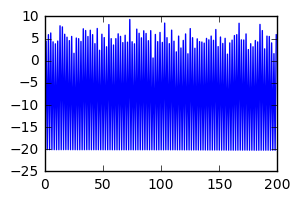

    After 100 iterations
        Discriminator Loss                         = 4.0516166687
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.3501329422
12


    After 100 iterations
        Discriminator Loss                         = 7.28178739548
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.98925673962
13


    After 100 iterations
        Discriminator Loss                         = 4.12434768677
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.67329502106
14


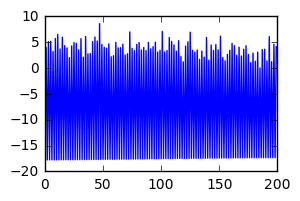

    After 100 iterations
        Discriminator Loss                         = 3.72803878784
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.05497384071
15


    After 100 iterations
        Discriminator Loss                         = 4.47997617722
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.61421823502
16


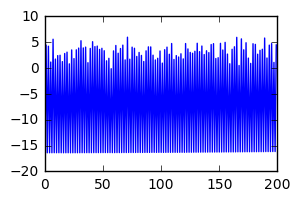

    After 100 iterations
        Discriminator Loss                         = 3.98236560822
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.49625301361
17


    After 100 iterations
        Discriminator Loss                         = 0.873093545437
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.90050315857
18


    After 100 iterations
        Discriminator Loss                         = 1.98033118248
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.15539741516
19


    After 100 iterations
        Discriminator Loss                         = 1.12403488159
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.67512559891
20


    After 100 iterations
        Discriminator Loss                         = 3.74469995499
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.45296275616
21


    After 100 iterations
        Discriminator Loss                         = 1.38560509682
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.75338125229
22


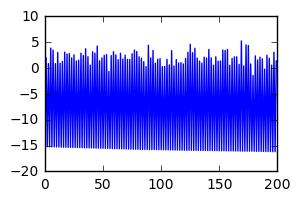

    After 100 iterations
        Discriminator Loss                         = 4.01756811142
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.66643130779
23


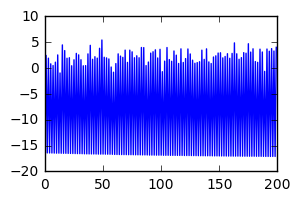

    After 100 iterations
        Discriminator Loss                         = 3.6746070385
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.84432303905
24


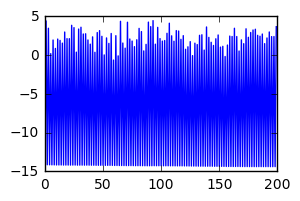

    After 100 iterations
        Discriminator Loss                         = 2.56620240211
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.32668542862
25
     Level #0 Epoch #0 Batch #25


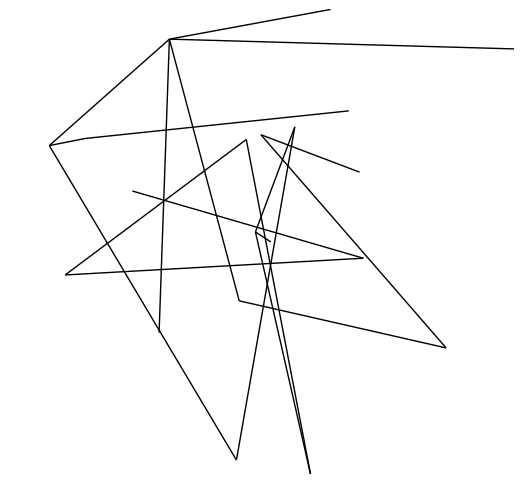

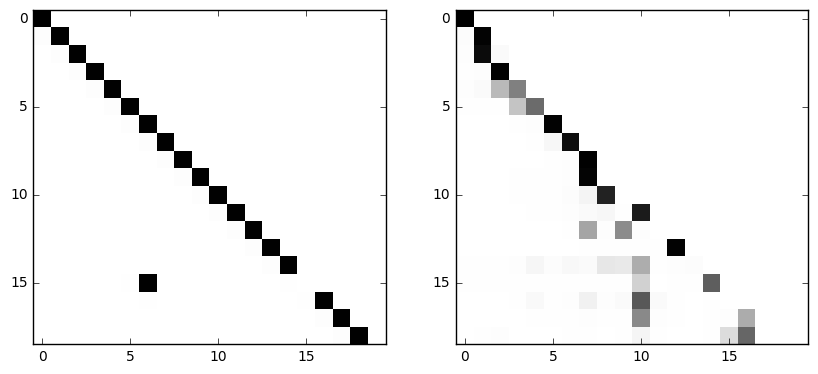

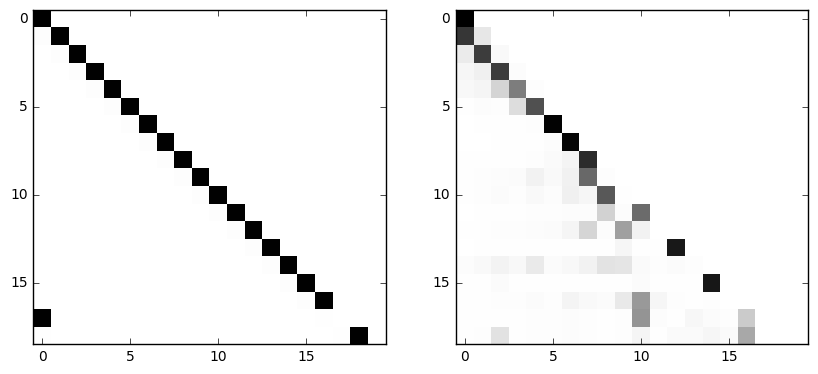

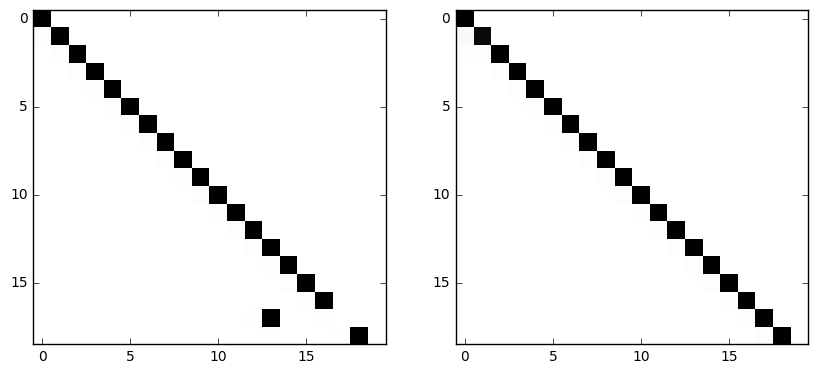

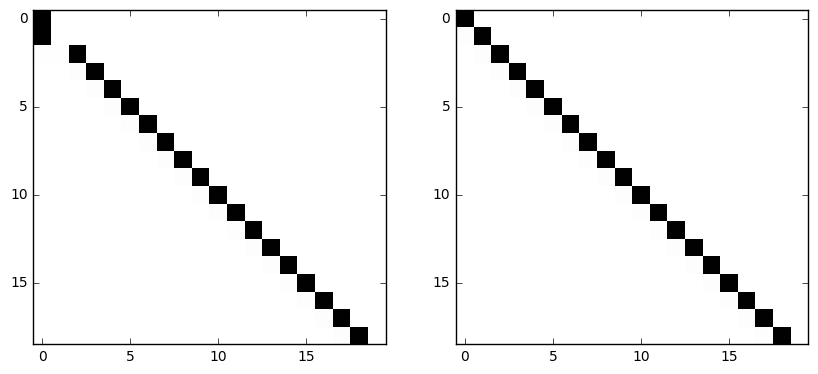

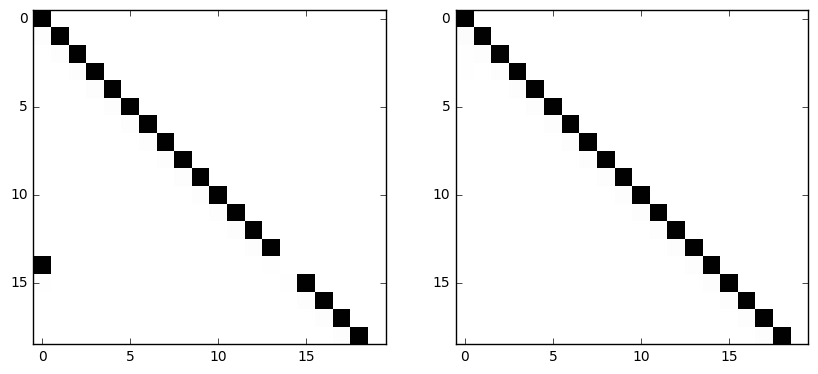

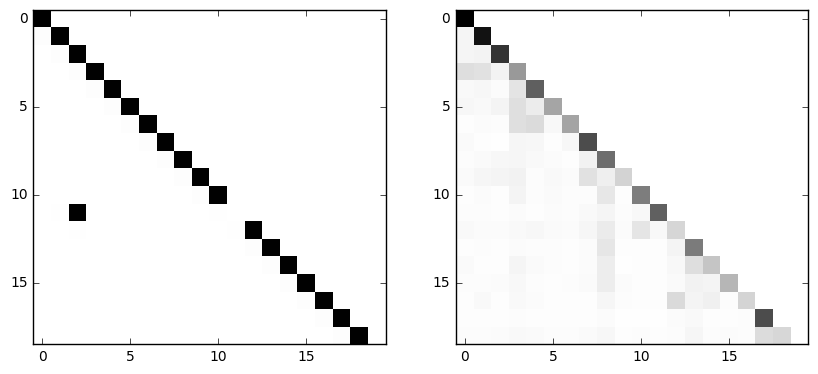

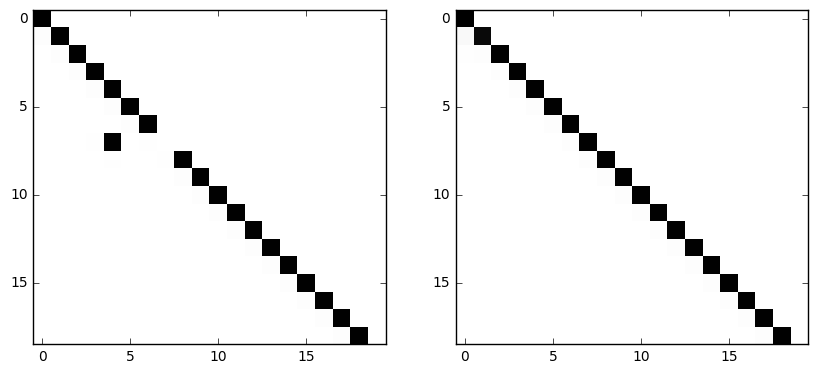

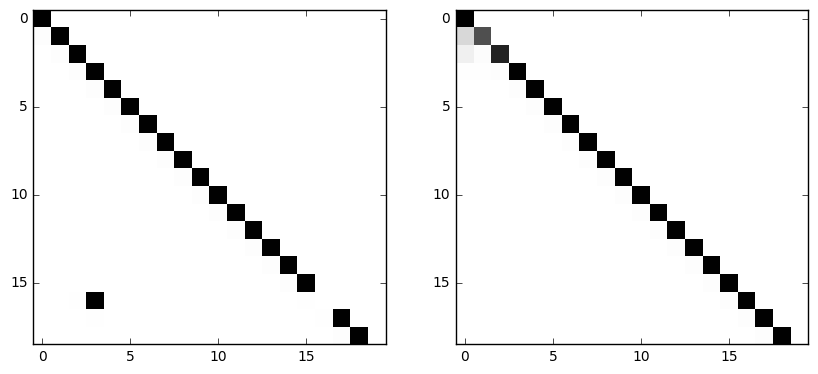

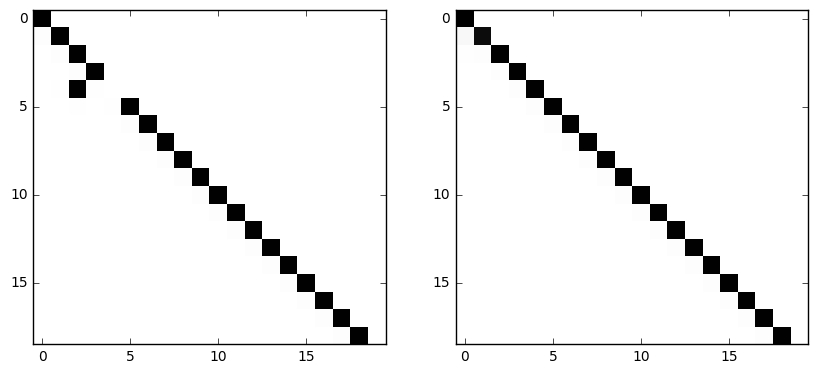

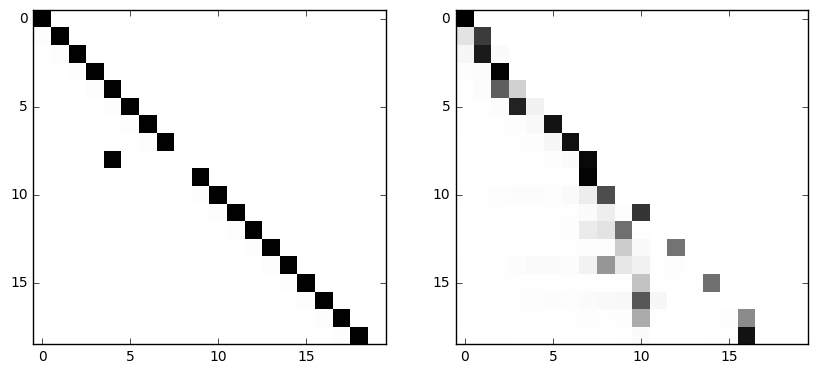

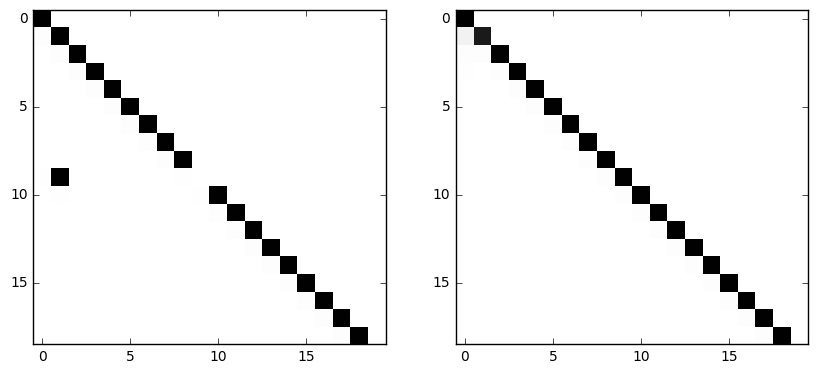

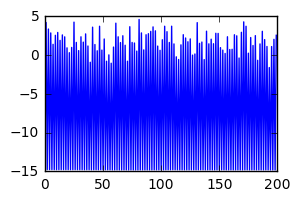

    After 100 iterations
        Discriminator Loss                         = 1.63603544235
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.886102080345
26


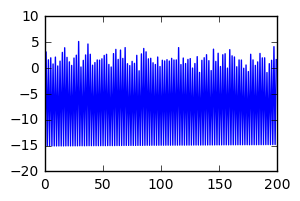

    After 100 iterations
        Discriminator Loss                         = 2.61591315269
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.0996265485883
27


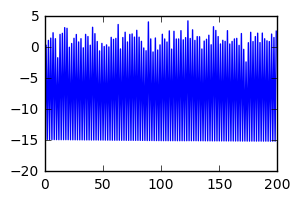

    After 100 iterations
        Discriminator Loss                         = 1.58614730835
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.0485097169876
28


    After 100 iterations
        Discriminator Loss                         = 0.5582421422
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.55358481407
29


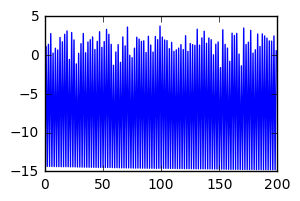

    After 100 iterations
        Discriminator Loss                         = 0.98995423317
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.16554927826
30


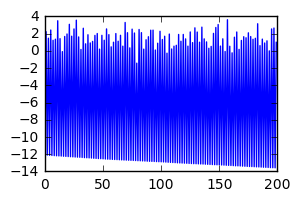

    After 100 iterations
        Discriminator Loss                         = 1.78987932205
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.0703802853823
31


    After 100 iterations
        Discriminator Loss                         = 2.54752612114
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.30730581284
32


    After 100 iterations
        Discriminator Loss                         = 0.522369384766
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.84948444366
33


    After 100 iterations
        Discriminator Loss                         = 2.1923828125
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.09697699547
34


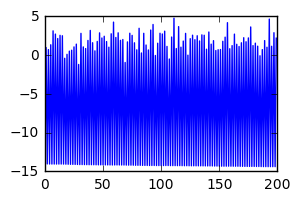

    After 100 iterations
        Discriminator Loss                         = 0.433965027332
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.23993182182
35


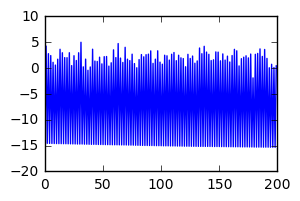

    After 100 iterations
        Discriminator Loss                         = 1.82965266705
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.30152463913
36


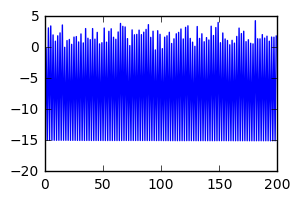

    After 100 iterations
        Discriminator Loss                         = 1.97454464436
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.07536351681
37


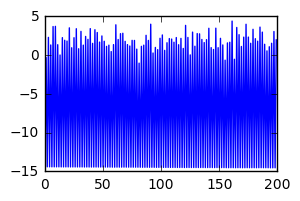

    After 100 iterations
        Discriminator Loss                         = 0.663590788841
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.05244541168
38


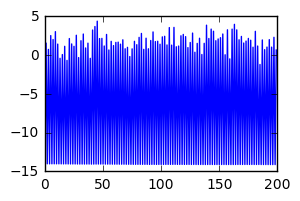

    After 100 iterations
        Discriminator Loss                         = 2.18015575409
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.46283185482
39


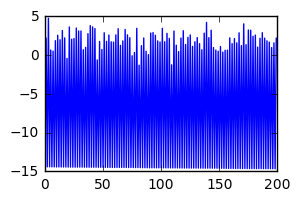

    After 100 iterations
        Discriminator Loss                         = -1.17801260948
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.75451791286
40


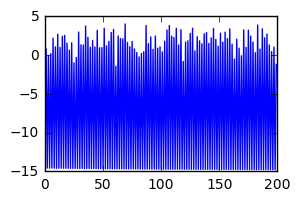

    After 100 iterations
        Discriminator Loss                         = 2.82946419716
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.53967928886
41


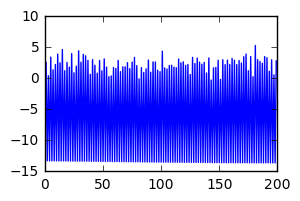

    After 100 iterations
        Discriminator Loss                         = 1.38917183876
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.1799287796
42


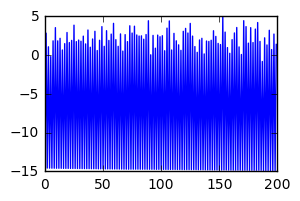

    After 100 iterations
        Discriminator Loss                         = 1.47029006481
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.64527797699
43


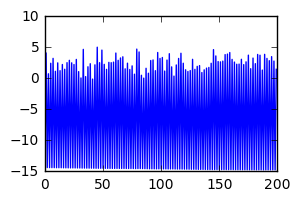

    After 100 iterations
        Discriminator Loss                         = 1.06537783146
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.01497077942
44


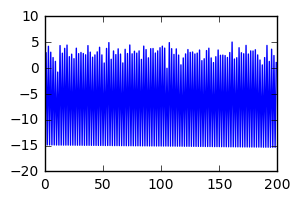

    After 100 iterations
        Discriminator Loss                         = 2.02669167519
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.09031677246
45


    After 100 iterations
        Discriminator Loss                         = 0.564987659454
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.49692726135
46


    After 100 iterations
        Discriminator Loss                         = 3.80345225334
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.20236063004
47


    After 100 iterations
        Discriminator Loss                         = 2.4801197052
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.47392690182
48


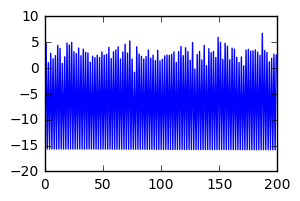

    After 100 iterations
        Discriminator Loss                         = 2.33926343918
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.15595240891
49


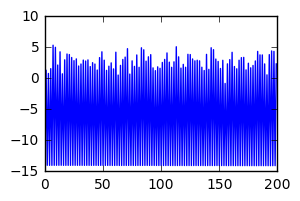

    After 100 iterations
        Discriminator Loss                         = 1.62685132027
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.46362566948
50
     Level #0 Epoch #0 Batch #50


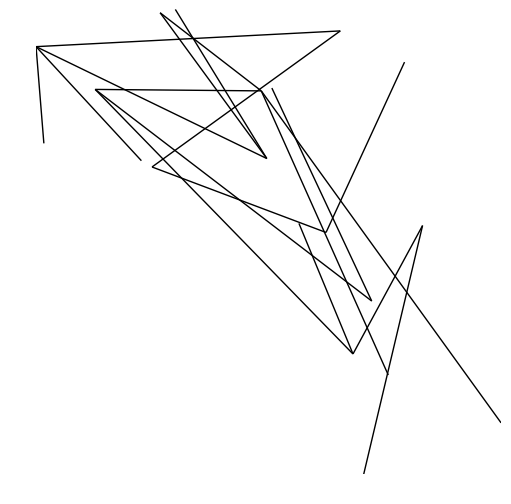

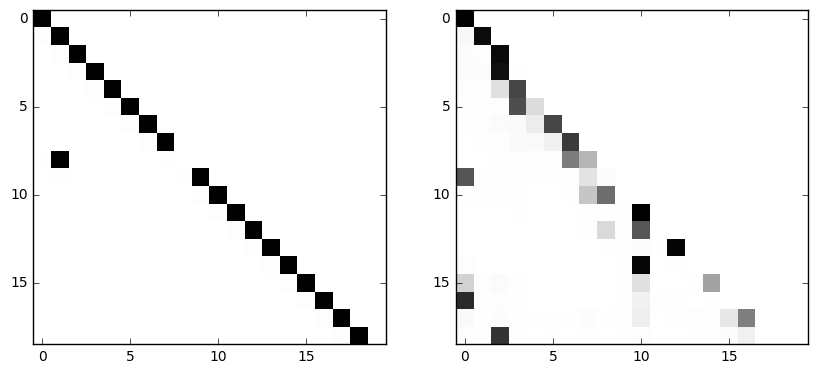

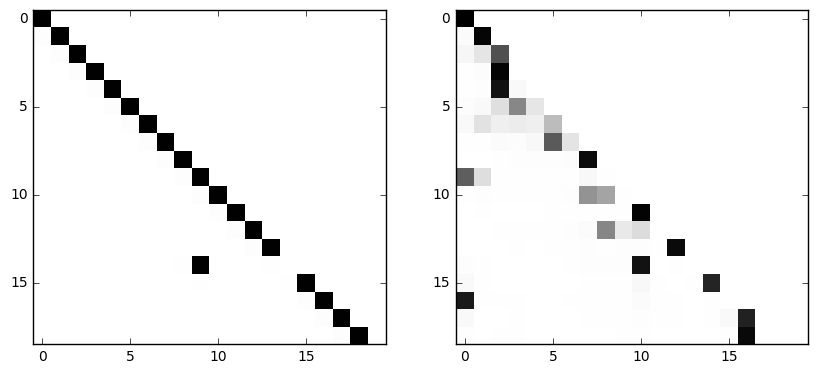

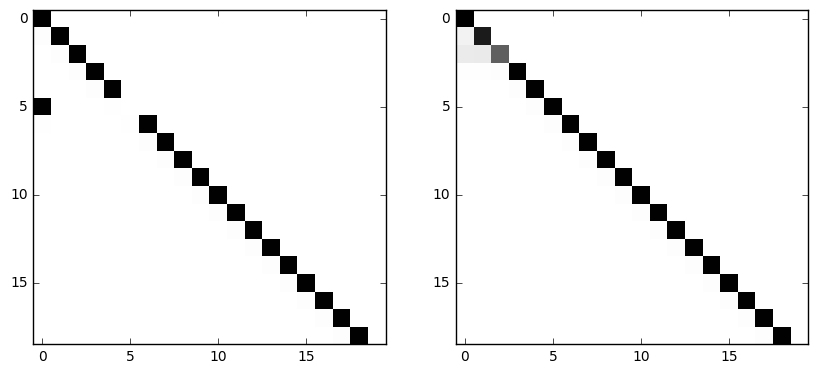

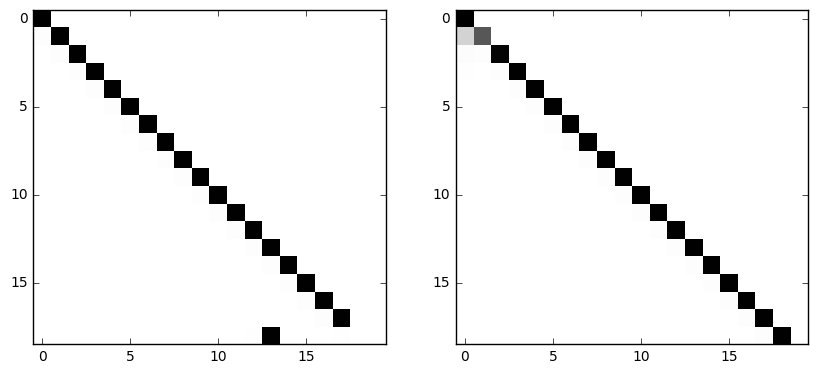

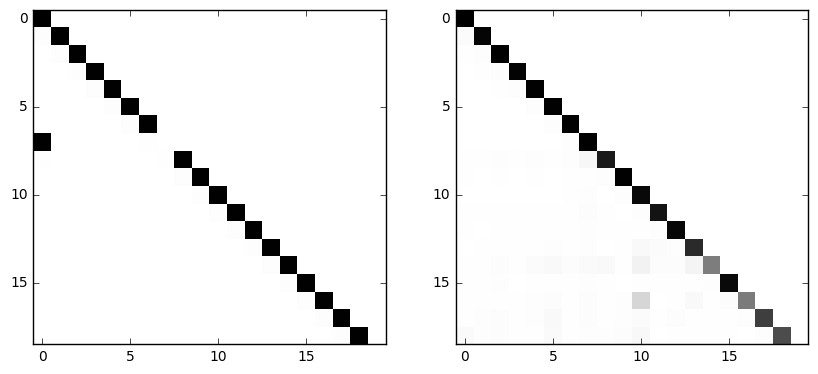

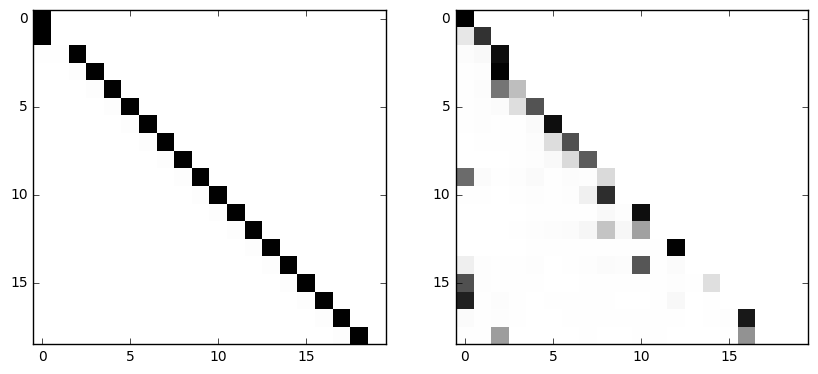

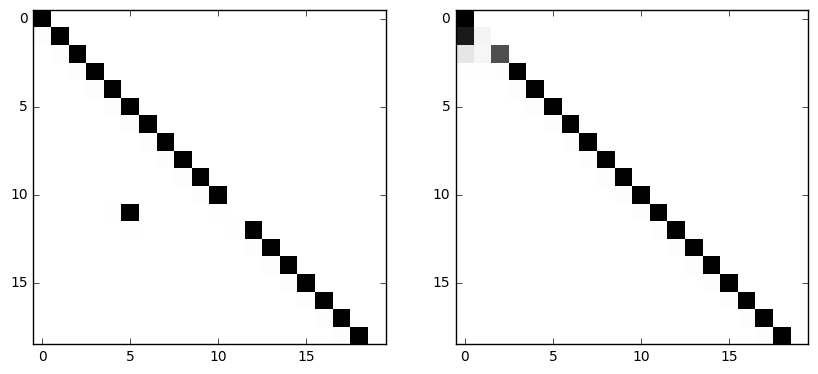

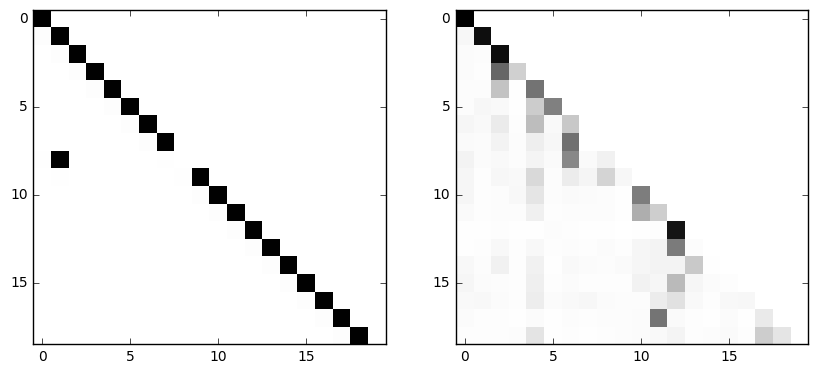

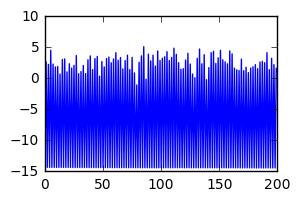

    After 100 iterations
        Discriminator Loss                         = 3.05054426193
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.44494652748
51


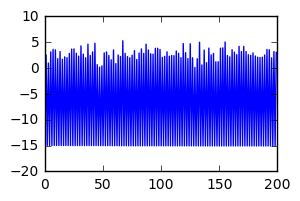

    After 100 iterations
        Discriminator Loss                         = 3.27322220802
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.99119281769
52


    After 100 iterations
        Discriminator Loss                         = 3.76003599167
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.30110907555
53


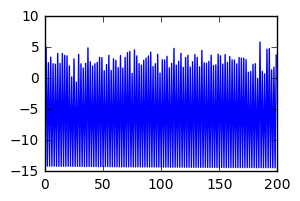

    After 100 iterations
        Discriminator Loss                         = 3.16964411736
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.99338102341
54


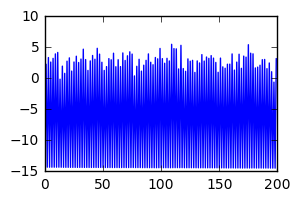

    After 100 iterations
        Discriminator Loss                         = 2.80788803101
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.25939750671
55


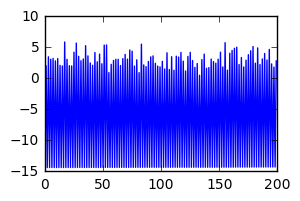

    After 100 iterations
        Discriminator Loss                         = 3.71351575851
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.30431747437
56


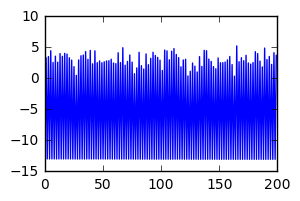

    After 100 iterations
        Discriminator Loss                         = 3.40929245949
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.59058308601
57


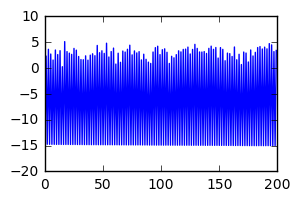

    After 100 iterations
        Discriminator Loss                         = 1.71822440624
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.2017326355
58


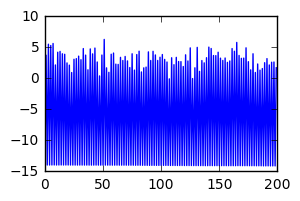

    After 100 iterations
        Discriminator Loss                         = 2.60171318054
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.84593367577
59


    After 100 iterations
        Discriminator Loss                         = 3.3702018261
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.33727478981
60


    After 100 iterations
        Discriminator Loss                         = 5.39978122711
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.25937819481
61


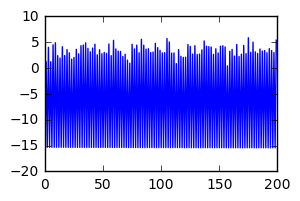

    After 100 iterations
        Discriminator Loss                         = 3.60284495354
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.35974121094
62


    After 100 iterations
        Discriminator Loss                         = 3.52726364136
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.70913267136
63


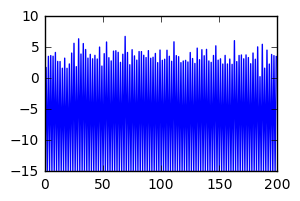

    After 100 iterations
        Discriminator Loss                         = 2.23759102821
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.80693054199
64


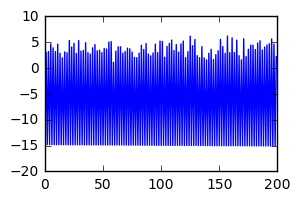

    After 100 iterations
        Discriminator Loss                         = 3.79191470146
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.40110397339
65


    After 100 iterations
        Discriminator Loss                         = 3.53107357025
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.13423442841
66


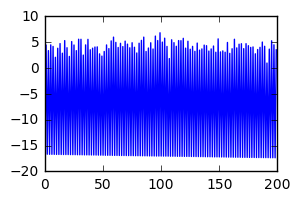

    After 100 iterations
        Discriminator Loss                         = 2.42304182053
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.94738483429
67


    After 100 iterations
        Discriminator Loss                         = 6.94142007828
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.03789520264
68


    After 100 iterations
        Discriminator Loss                         = 4.58141469955
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.90974116325
69


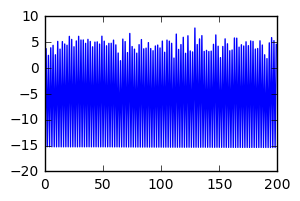

    After 100 iterations
        Discriminator Loss                         = 5.84479951859
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.71784067154
70


    After 100 iterations
        Discriminator Loss                         = 3.56511425972
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.83143758774
71


    After 100 iterations
        Discriminator Loss                         = 3.62652659416
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -7.00152015686
72


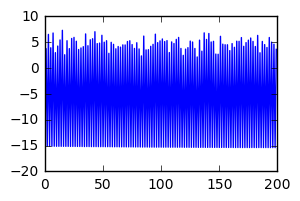

    After 100 iterations
        Discriminator Loss                         = 7.36549139023
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.73355484009
73


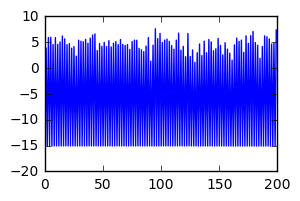

    After 100 iterations
        Discriminator Loss                         = 3.44905018806
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.95272350311
74


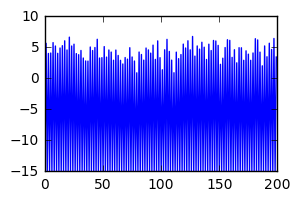

    After 100 iterations
        Discriminator Loss                         = 1.6447571516
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.0078959465
75
     Level #0 Epoch #0 Batch #75


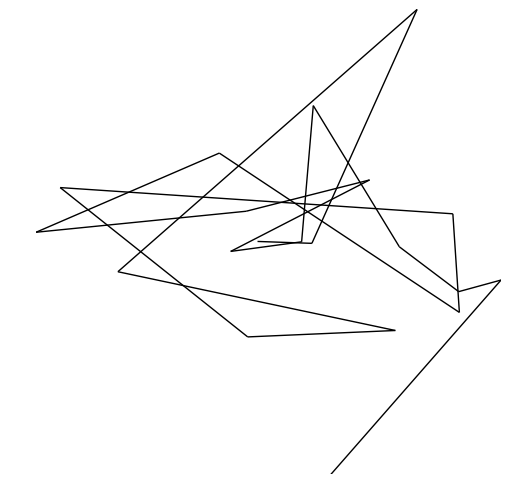

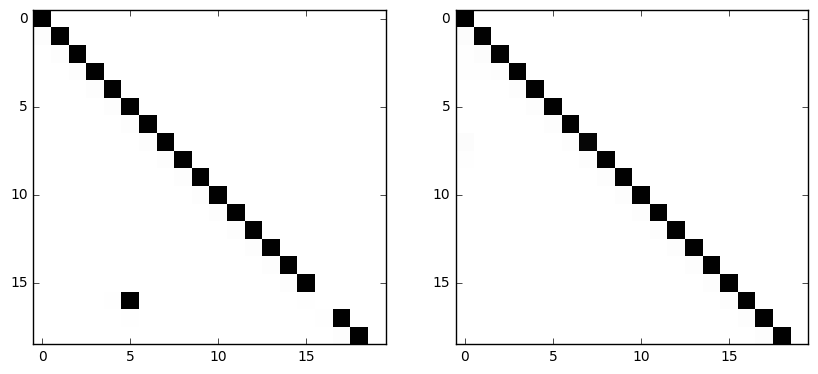

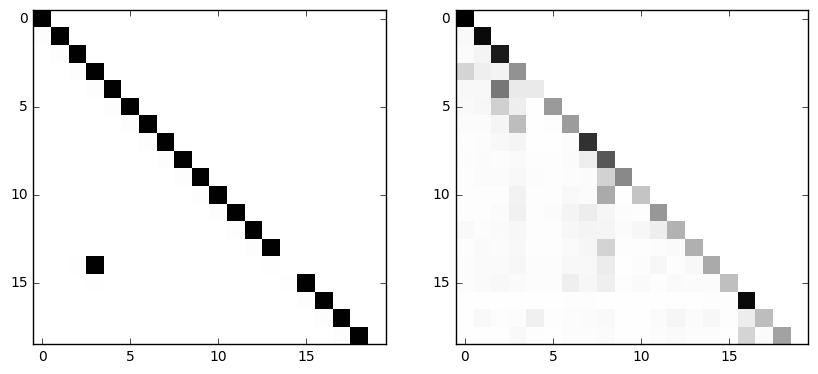

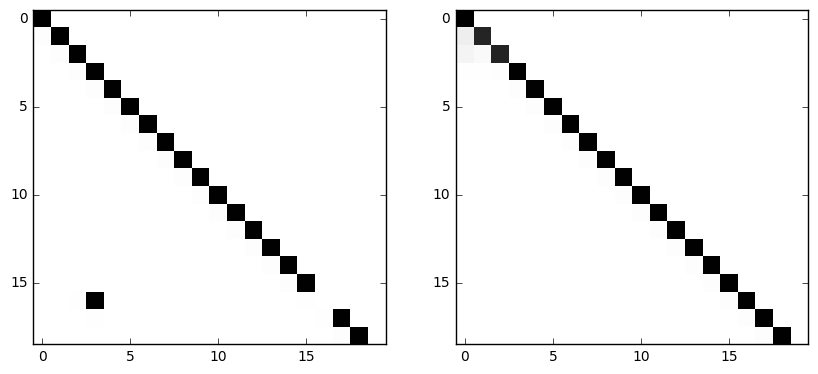

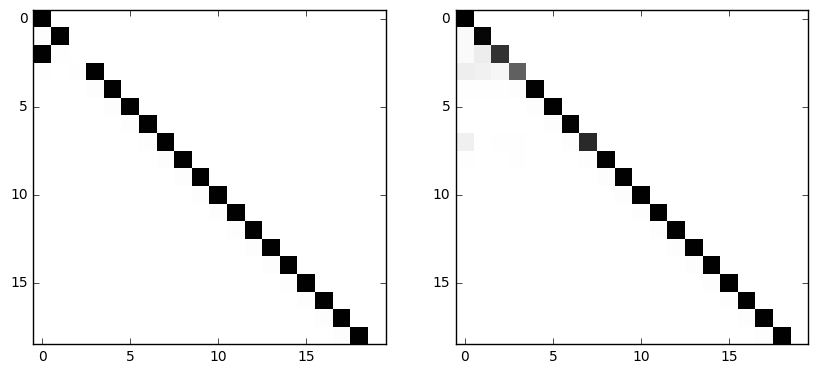

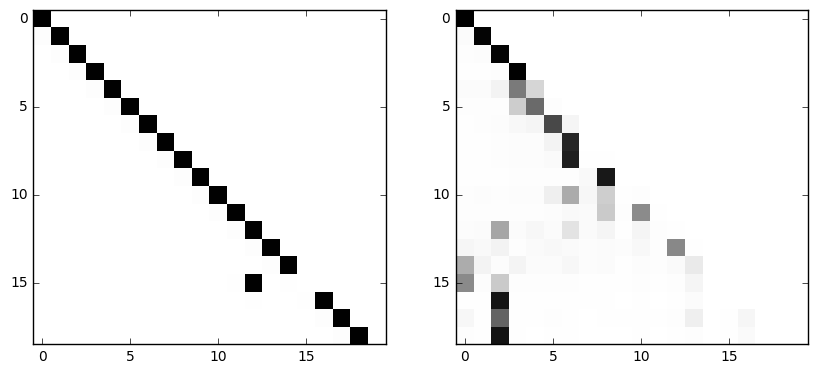

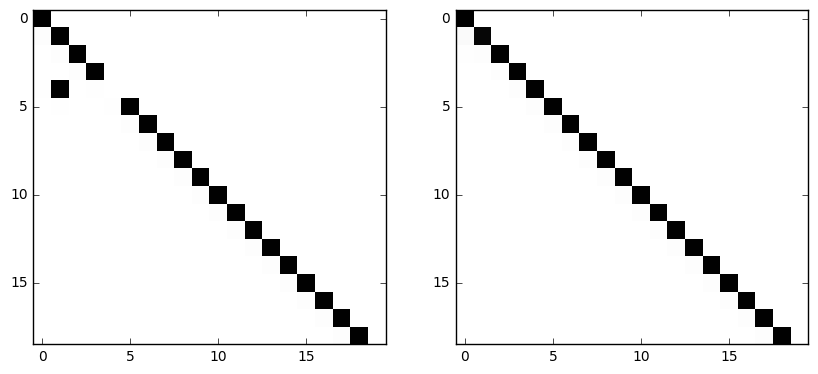

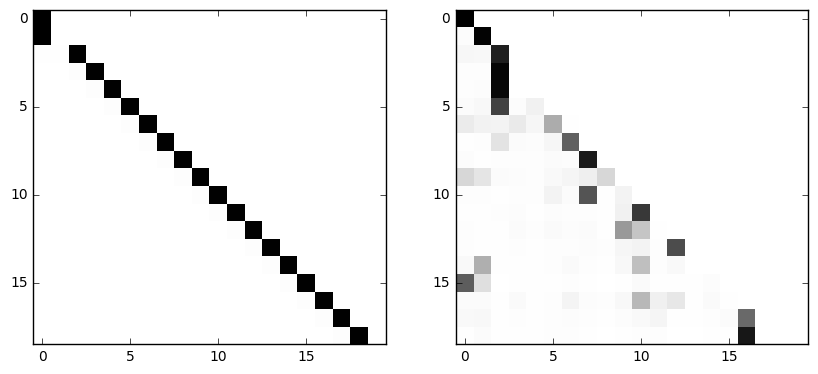

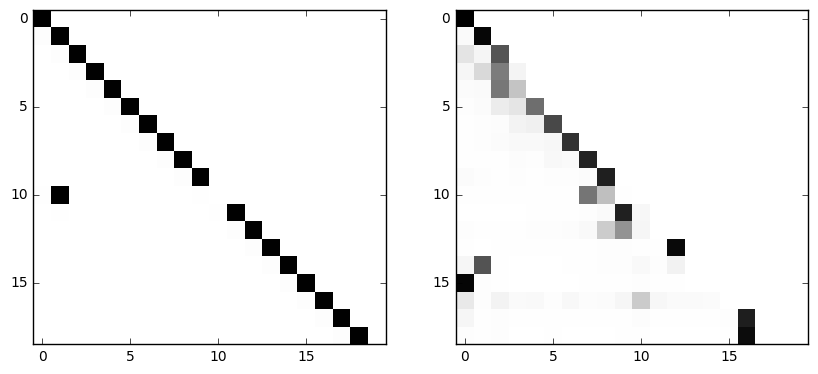

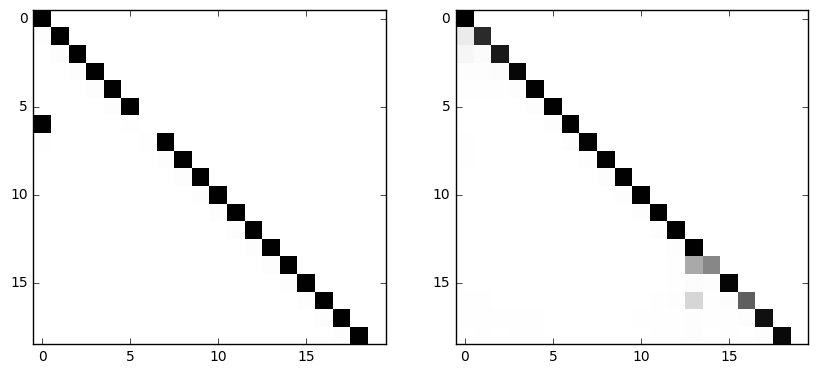

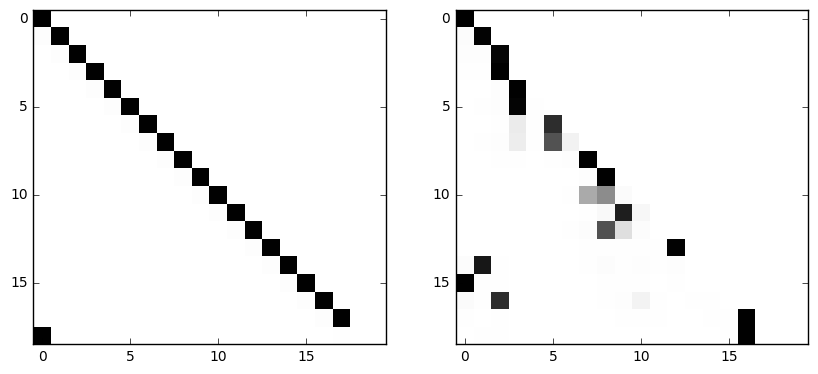

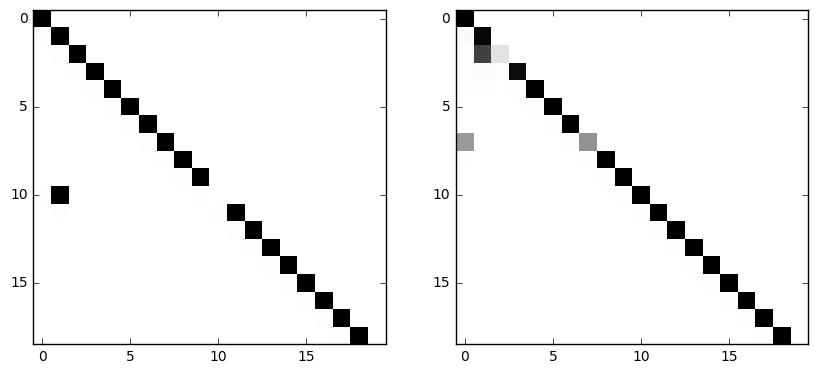

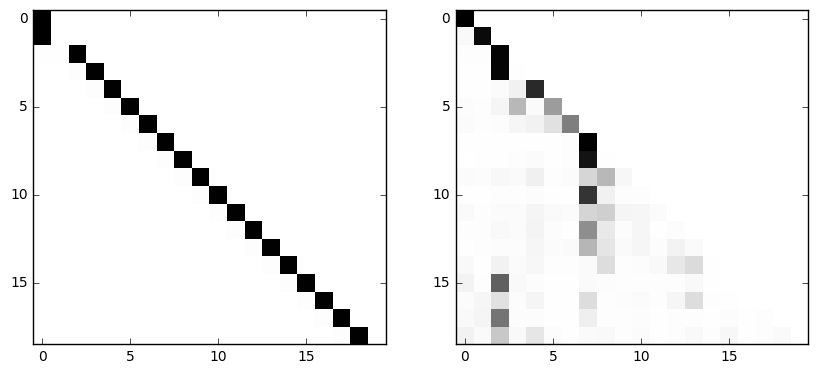

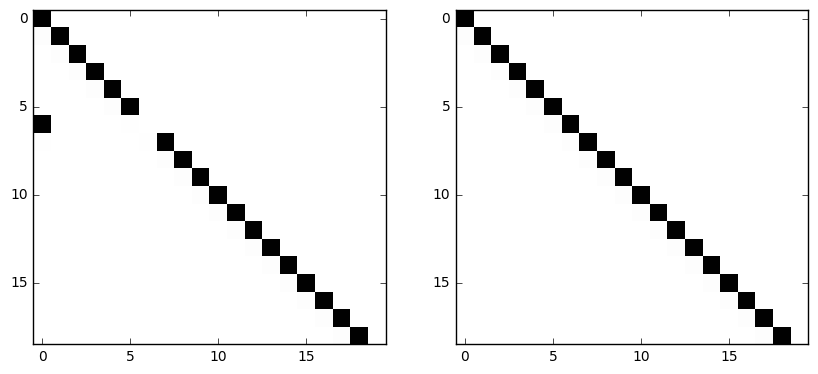

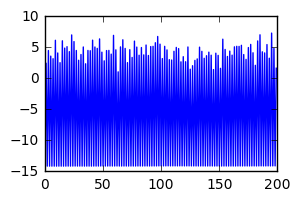

    After 100 iterations
        Discriminator Loss                         = 4.32434129715
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.96046519279
76


    After 100 iterations
        Discriminator Loss                         = 2.86654448509
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.6879196167
77


    After 100 iterations
        Discriminator Loss                         = 3.08660960197
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.68528223038
78


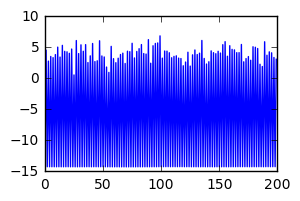

    After 100 iterations
        Discriminator Loss                         = 3.03035020828
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.62153148651
79


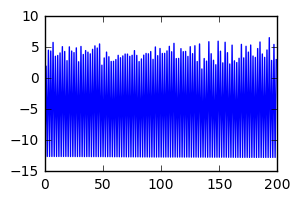

    After 100 iterations
        Discriminator Loss                         = 4.33238077164
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.00685119629
80


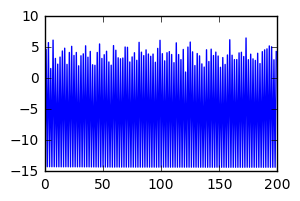

    After 100 iterations
        Discriminator Loss                         = 3.56633377075
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.01424646378
81


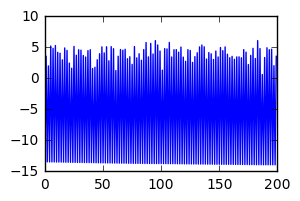

    After 100 iterations
        Discriminator Loss                         = 5.7371711731
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.10117387772
82


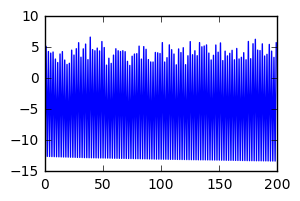

    After 100 iterations
        Discriminator Loss                         = 2.94794821739
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.52019548416
83


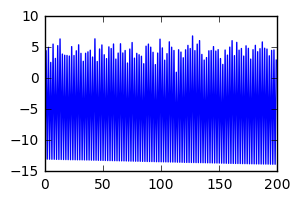

    After 100 iterations
        Discriminator Loss                         = 6.04648685455
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.96624112129
84


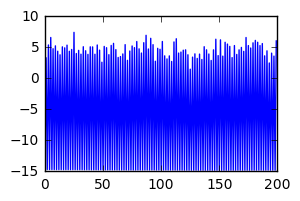

    After 100 iterations
        Discriminator Loss                         = 6.4556183815
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.33284330368
85


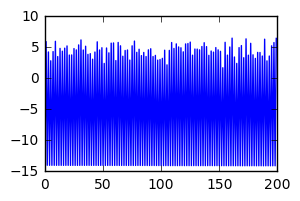

    After 100 iterations
        Discriminator Loss                         = 2.05347895622
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.09218549728
86


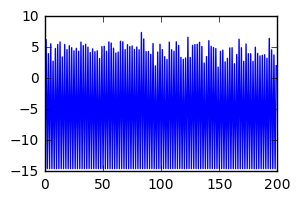

    After 100 iterations
        Discriminator Loss                         = 5.18765354156
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.53971076012
87


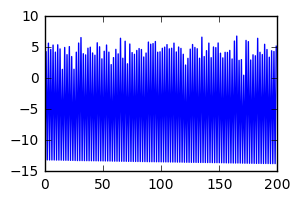

    After 100 iterations
        Discriminator Loss                         = 4.42681932449
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.87542867661
88


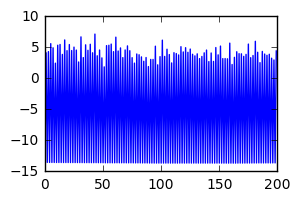

    After 100 iterations
        Discriminator Loss                         = 3.56865572929
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.5319583416
89


    After 100 iterations
        Discriminator Loss                         = 3.7212228775
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.14282727242
90


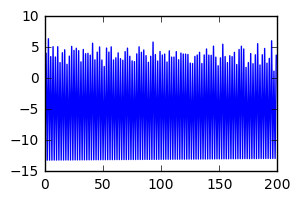

    After 100 iterations
        Discriminator Loss                         = 3.20087194443
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.34763121605
91


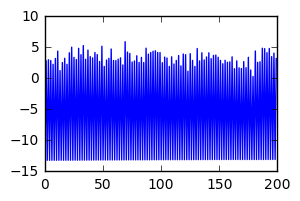

    After 100 iterations
        Discriminator Loss                         = 4.02627182007
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.21543121338
92


    After 100 iterations
        Discriminator Loss                         = 4.13815069199
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.77092838287
93


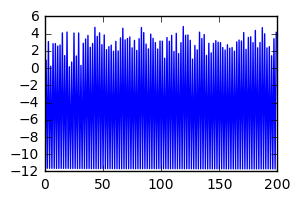

    After 100 iterations
        Discriminator Loss                         = 4.06615304947
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.45559692383
94


    After 100 iterations
        Discriminator Loss                         = 3.64147377014
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.59573316574
95


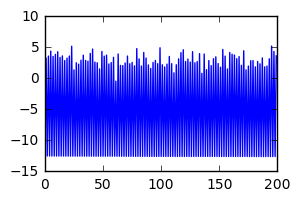

    After 100 iterations
        Discriminator Loss                         = 3.27152681351
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.16818571091
96


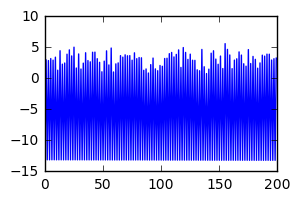

    After 100 iterations
        Discriminator Loss                         = 1.21826422215
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.46258687973
97


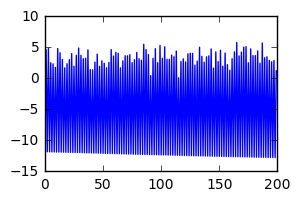

    After 100 iterations
        Discriminator Loss                         = 3.37124323845
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.50388240814
98


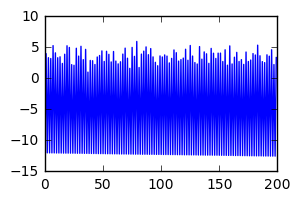

    After 100 iterations
        Discriminator Loss                         = 3.36807632446
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.43861961365
99


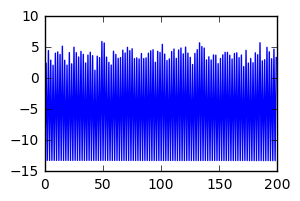

    After 100 iterations
        Discriminator Loss                         = 3.82184815407
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.69440627098
100
     Level #0 Epoch #0 Batch #100


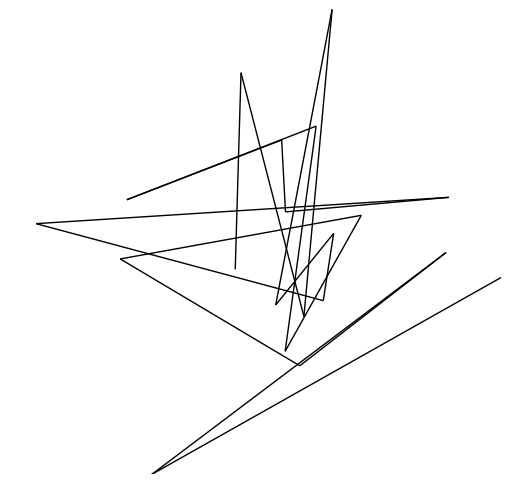

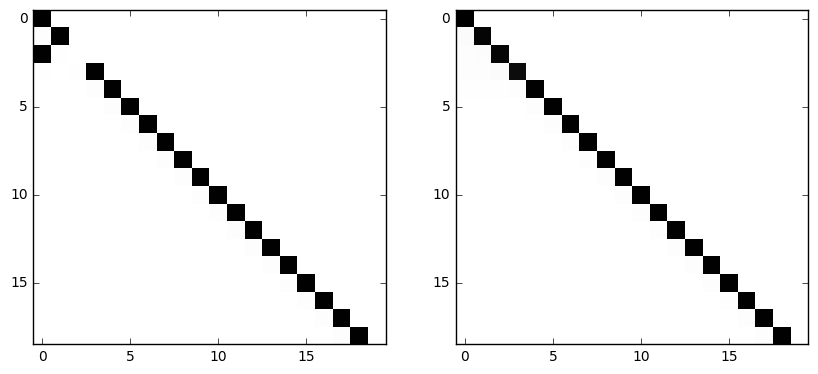

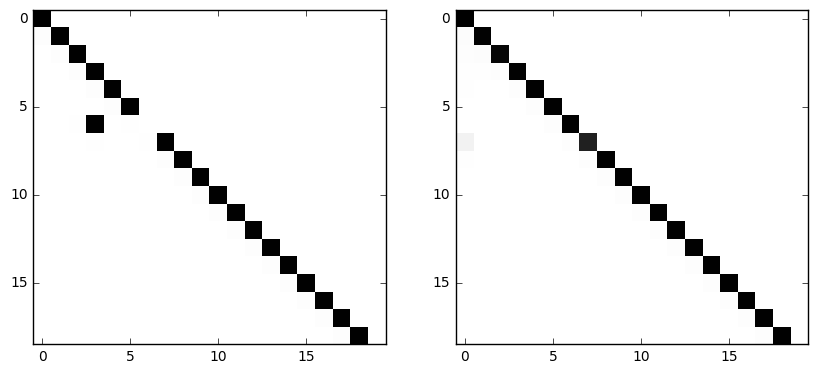

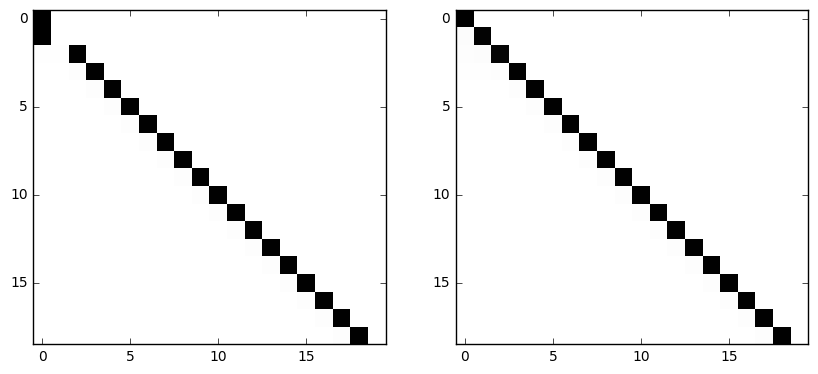

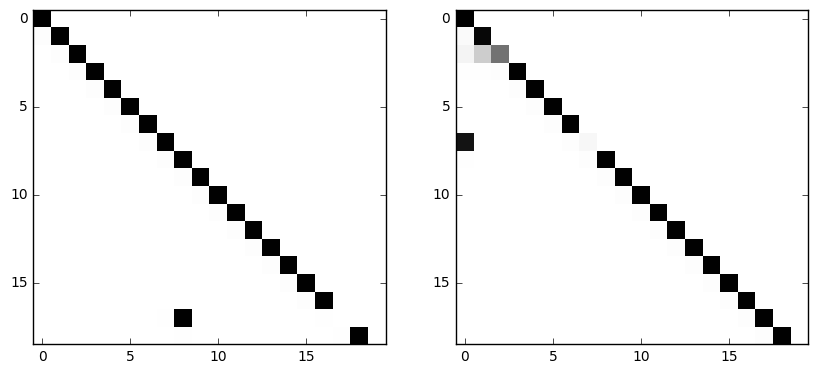

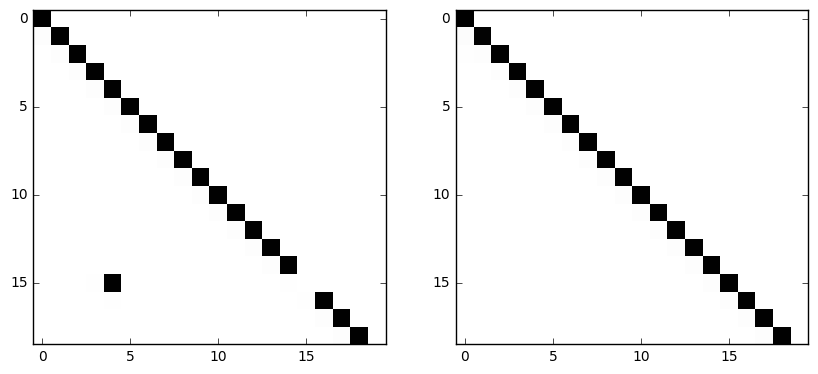

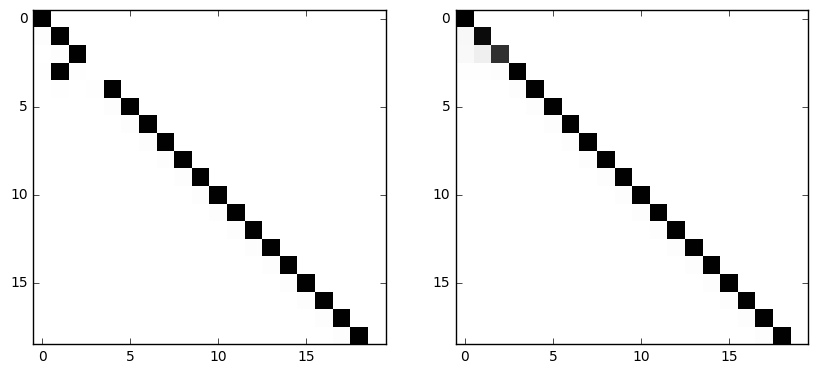

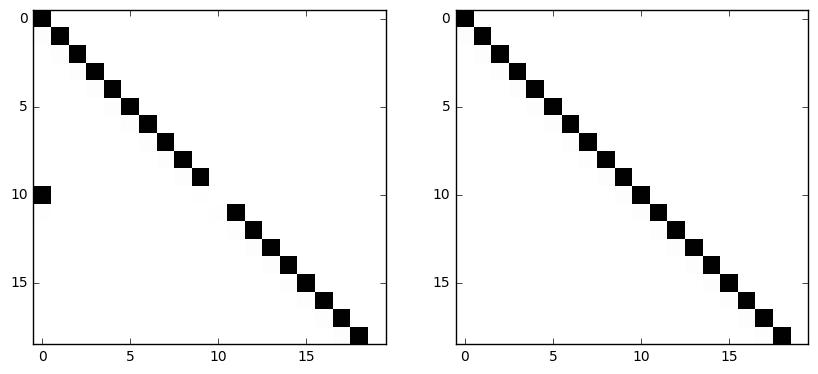

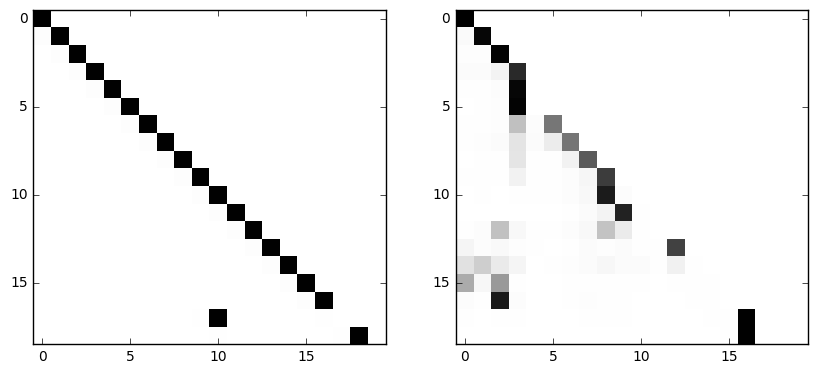

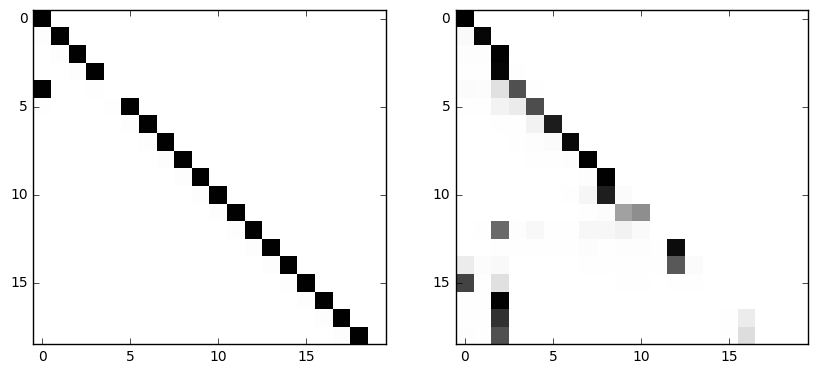

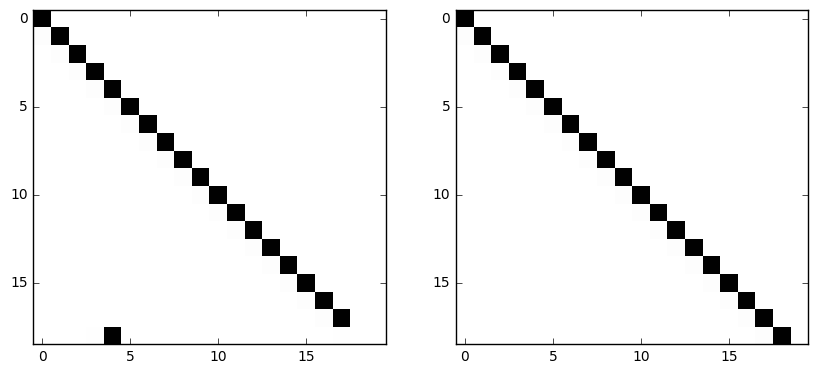

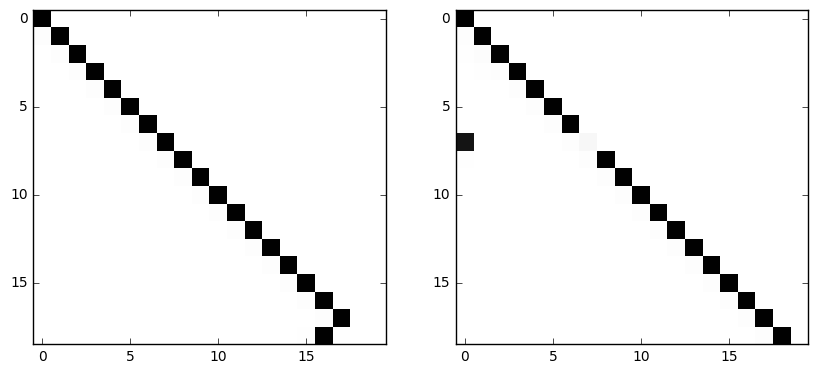

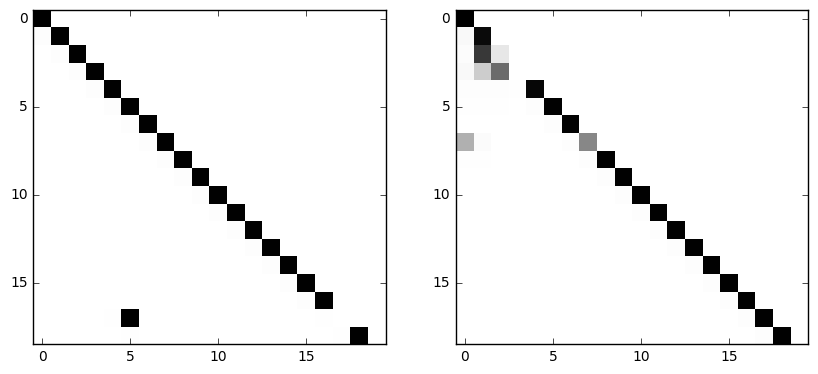

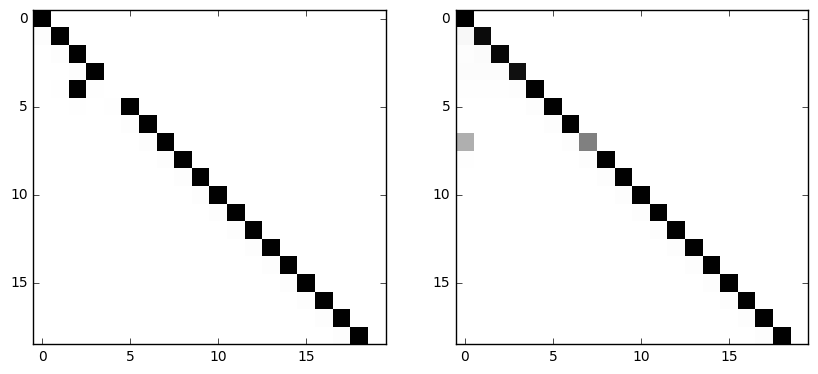

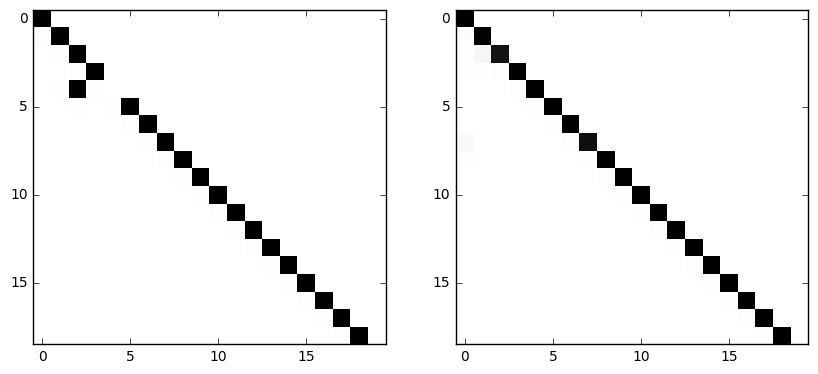

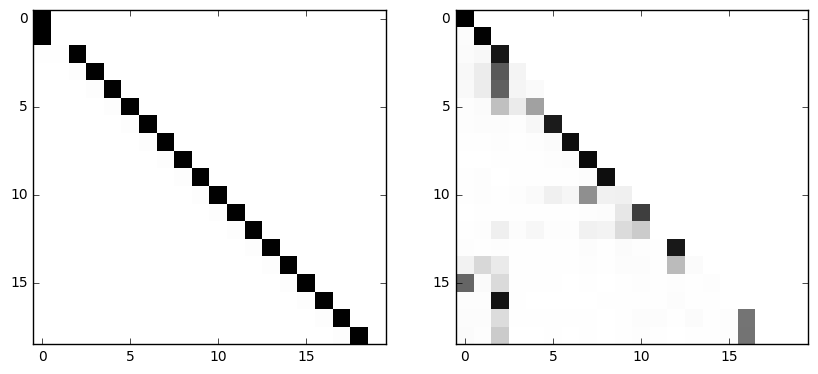

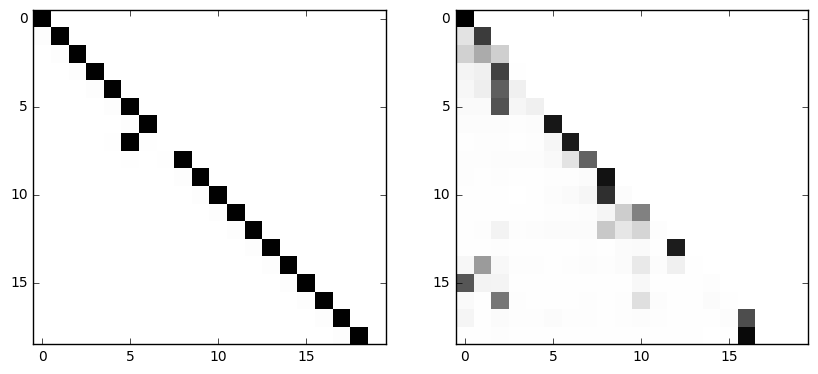

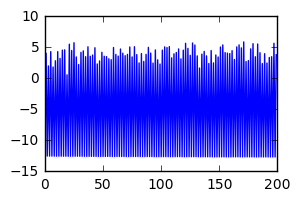

    After 100 iterations
        Discriminator Loss                         = 4.82011032104
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.6512901783
101


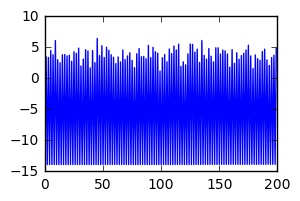

    After 100 iterations
        Discriminator Loss                         = 2.7890150547
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.80032491684
102


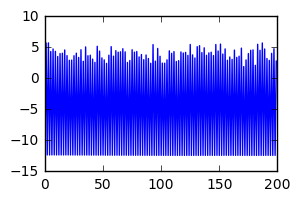

    After 100 iterations
        Discriminator Loss                         = 5.38014745712
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.49862575531
103


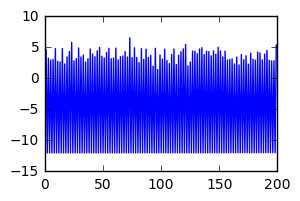

    After 100 iterations
        Discriminator Loss                         = 5.80342435837
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.96005105972
104


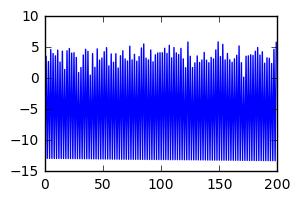

    After 100 iterations
        Discriminator Loss                         = 3.71244883537
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.4928278923
105


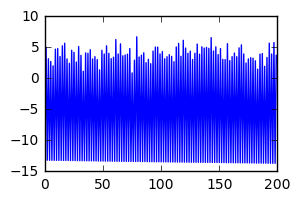

    After 100 iterations
        Discriminator Loss                         = 3.47427749634
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.831105351448
106


    After 100 iterations
        Discriminator Loss                         = 2.95262312889
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.86968326569
107


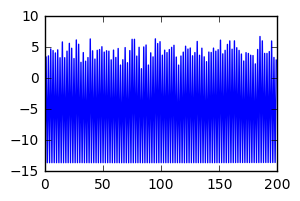

    After 100 iterations
        Discriminator Loss                         = 5.33768844604
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.79642176628
108


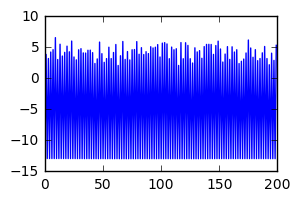

    After 100 iterations
        Discriminator Loss                         = 2.63495540619
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.87446498871
109


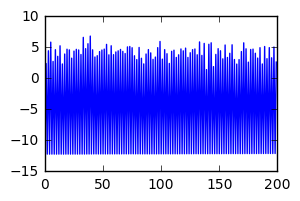

    After 100 iterations
        Discriminator Loss                         = 5.1271071434
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.28910446167
110


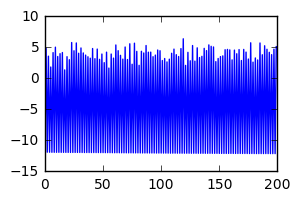

    After 100 iterations
        Discriminator Loss                         = 1.9749751091
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.30726647377
111


    After 100 iterations
        Discriminator Loss                         = 5.1300907135
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.96214818954
112


    After 100 iterations
        Discriminator Loss                         = 4.58152580261
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.64332675934
113


    After 100 iterations
        Discriminator Loss                         = 3.5162024498
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.99089026451
114


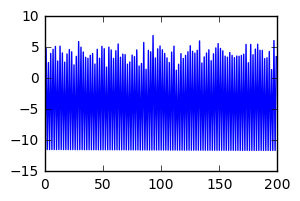

    After 100 iterations
        Discriminator Loss                         = 2.92261815071
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.09072113037
115


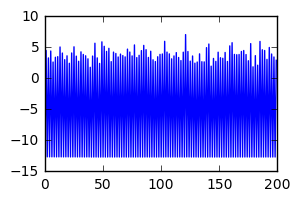

    After 100 iterations
        Discriminator Loss                         = 3.35694122314
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.94843387604
116


    After 100 iterations
        Discriminator Loss                         = 3.82969927788
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.23461055756
117


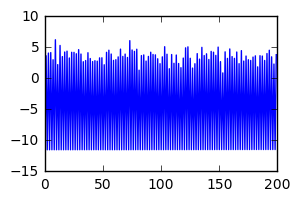

    After 100 iterations
        Discriminator Loss                         = 3.56003522873
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.77744913101
118


    After 100 iterations
        Discriminator Loss                         = 4.16015672684
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.80004024506
119


    After 100 iterations
        Discriminator Loss                         = 5.11345815659
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.33963131905
120


    After 100 iterations
        Discriminator Loss                         = 3.65703725815
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.56480097771
121


    After 100 iterations
        Discriminator Loss                         = 2.41858029366
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.64187240601
122


    After 100 iterations
        Discriminator Loss                         = 3.23718953133
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.7901096344
123


    After 100 iterations
        Discriminator Loss                         = 2.36569452286
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.20341348648
124


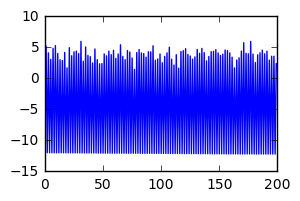

    After 100 iterations
        Discriminator Loss                         = 4.08061552048
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.42568302155
125
     Level #0 Epoch #0 Batch #125


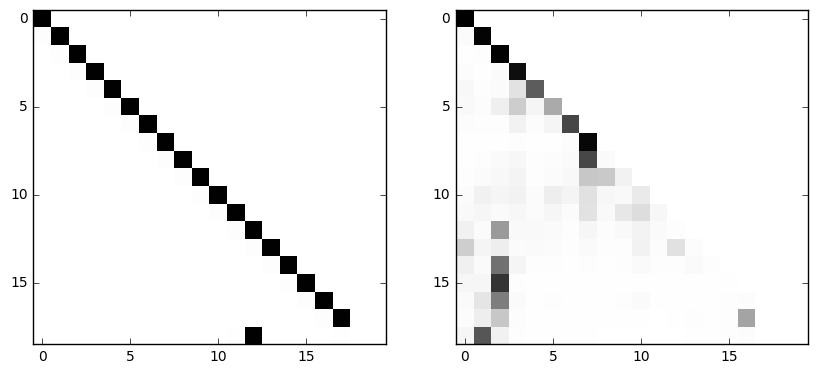

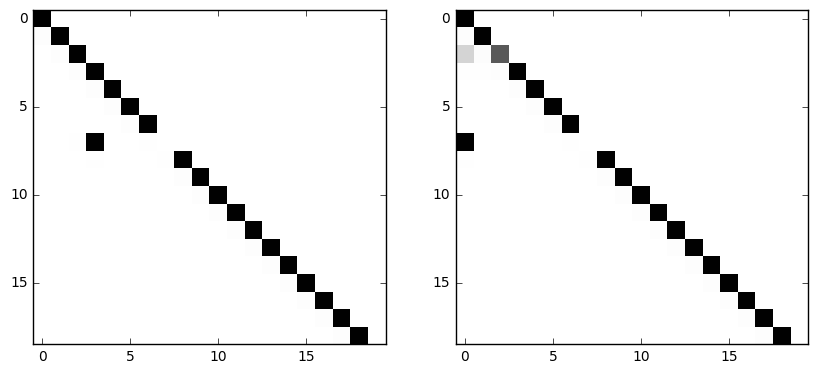

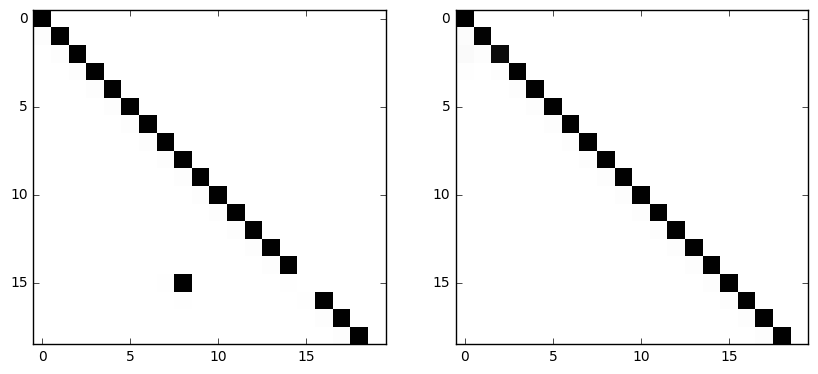

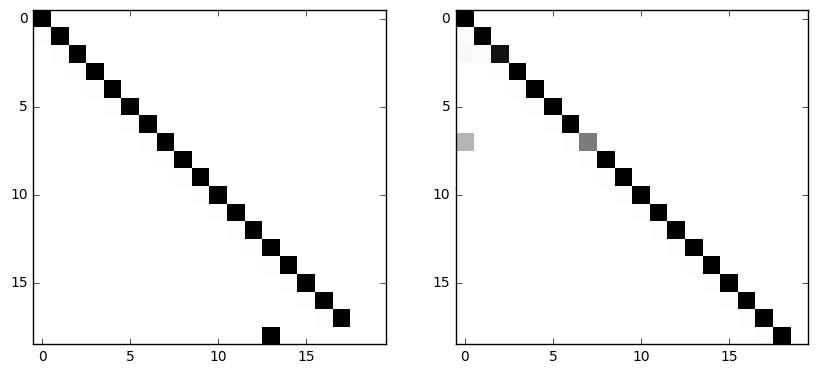

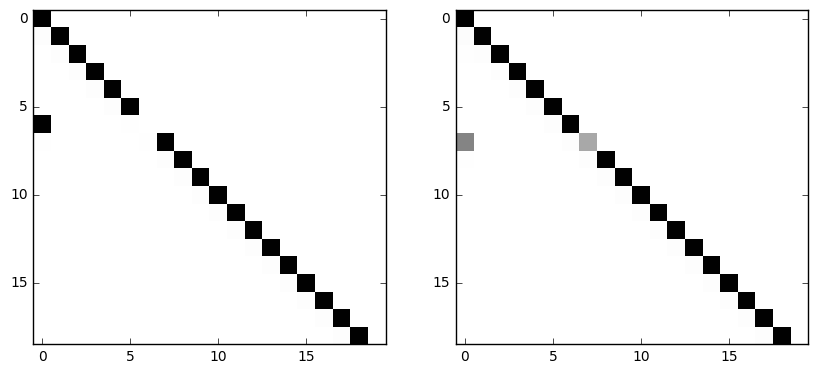

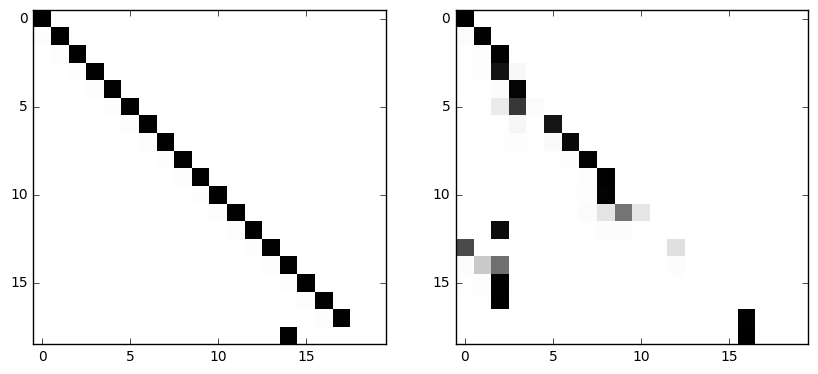

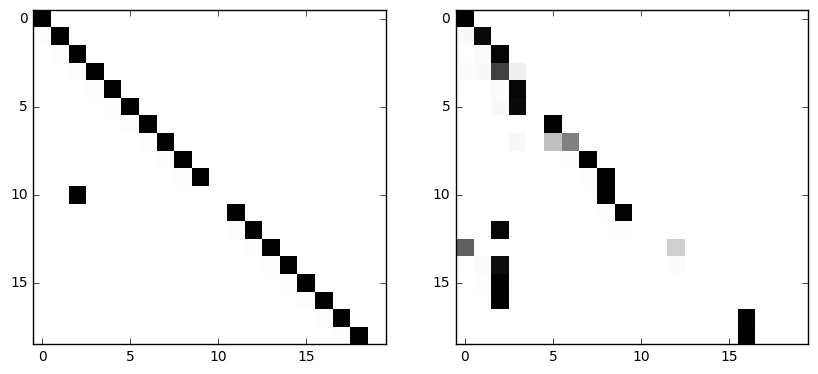

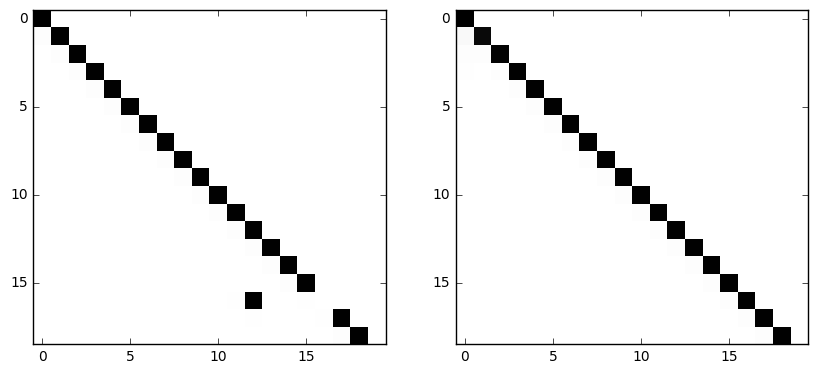

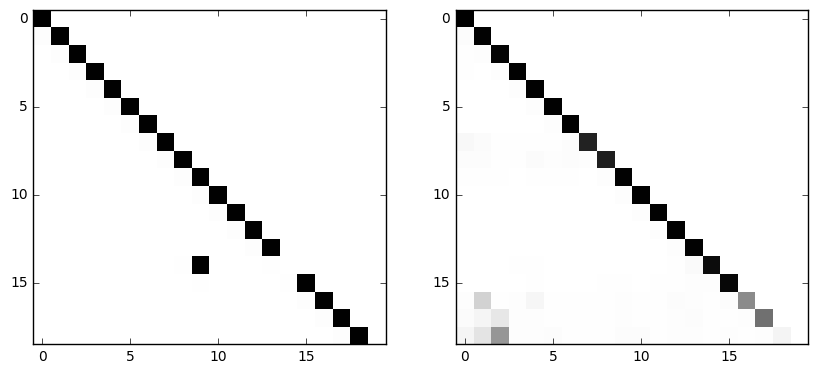

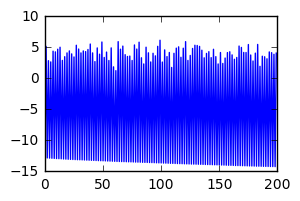

    After 100 iterations
        Discriminator Loss                         = 5.45730066299
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.108533144
126


    After 100 iterations
        Discriminator Loss                         = 4.02285957336
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.11767148972
127


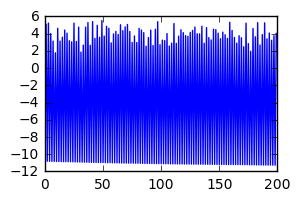

    After 100 iterations
        Discriminator Loss                         = 2.71896910667
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.68570518494
128


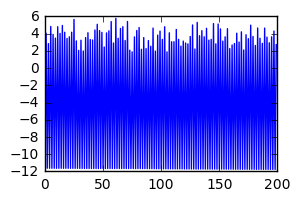

    After 100 iterations
        Discriminator Loss                         = 2.97376418114
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.09561014175
129


    After 100 iterations
        Discriminator Loss                         = 3.49810862541
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.92899990082
130


    After 100 iterations
        Discriminator Loss                         = 3.60567760468
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.565990448
131


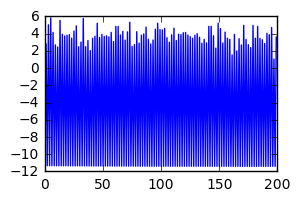

    After 100 iterations
        Discriminator Loss                         = 3.31773257256
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.78920316696
132


    After 100 iterations
        Discriminator Loss                         = 3.05090379715
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.12989163399
133


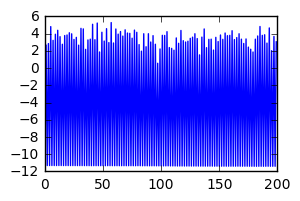

    After 100 iterations
        Discriminator Loss                         = 3.86103439331
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.25773668289
134


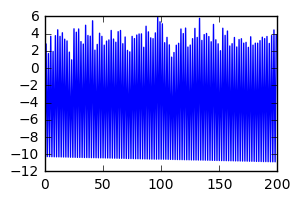

    After 100 iterations
        Discriminator Loss                         = 2.13351535797
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.05429840088
135


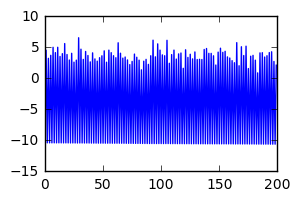

    After 100 iterations
        Discriminator Loss                         = 4.32639789581
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.61350774765
136


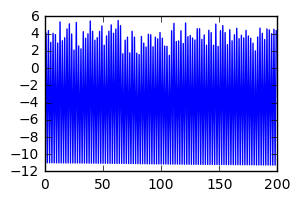

    After 100 iterations
        Discriminator Loss                         = 4.96472644806
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.94512343407
137


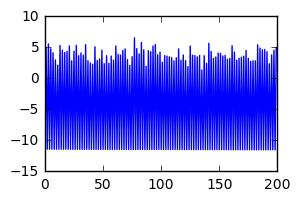

    After 100 iterations
        Discriminator Loss                         = 5.75947141647
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.8423511982
138


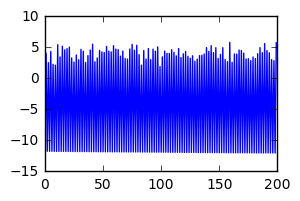

    After 100 iterations
        Discriminator Loss                         = 3.21602654457
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.23864746094
139


    After 100 iterations
        Discriminator Loss                         = 3.18363142014
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.33483409882
140


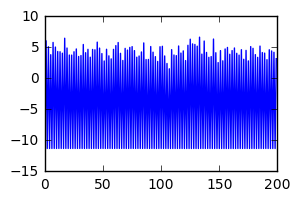

    After 100 iterations
        Discriminator Loss                         = 3.48901128769
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.336145401
141


    After 100 iterations
        Discriminator Loss                         = 4.2851061821
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.89518976212
142


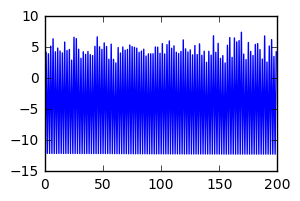

    After 100 iterations
        Discriminator Loss                         = 4.42501211166
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.71353912354
143


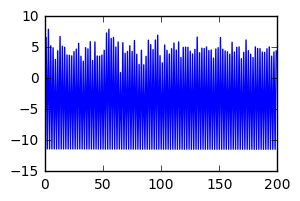

    After 100 iterations
        Discriminator Loss                         = 2.31212615967
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.24467134476
144


    After 100 iterations
        Discriminator Loss                         = 4.23562145233
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.41589069366
145


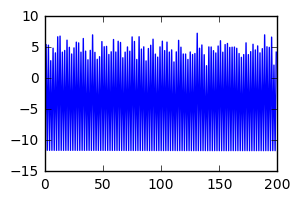

    After 100 iterations
        Discriminator Loss                         = 4.55176830292
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.13173294067
146


    After 100 iterations
        Discriminator Loss                         = 6.04597854614
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -7.72150278091
147


    After 100 iterations
        Discriminator Loss                         = 5.35490703583
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.71273612976
148


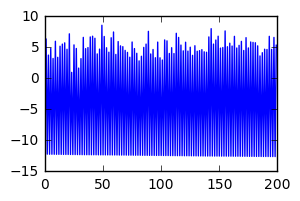

    After 100 iterations
        Discriminator Loss                         = 3.13788723946
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -7.45113706589
149


    After 100 iterations
        Discriminator Loss                         = 7.26836776733
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.44363498688
150
     Level #0 Epoch #0 Batch #150


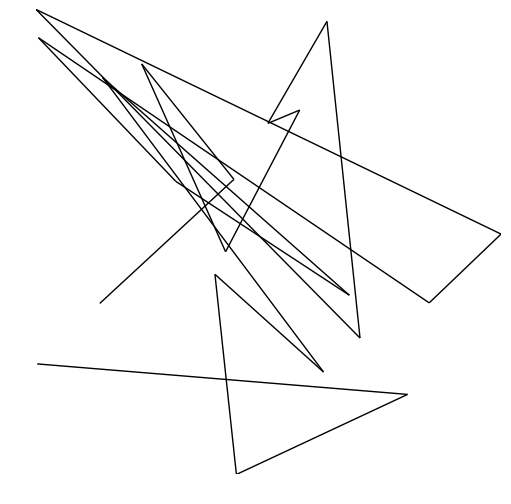

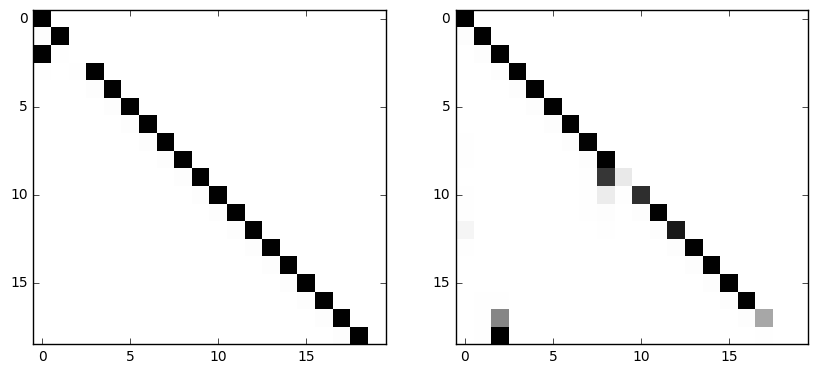

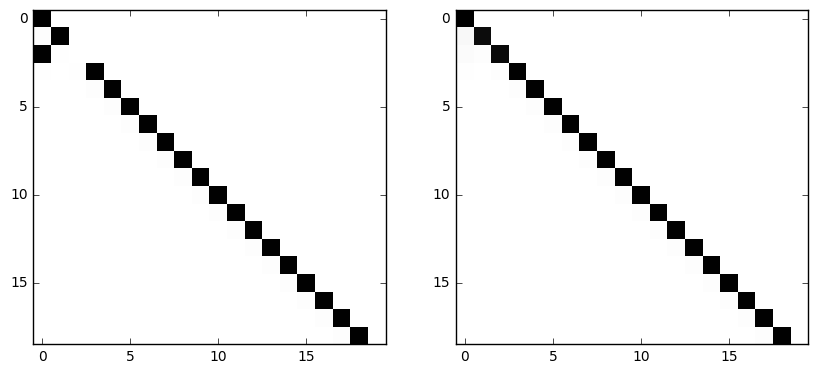

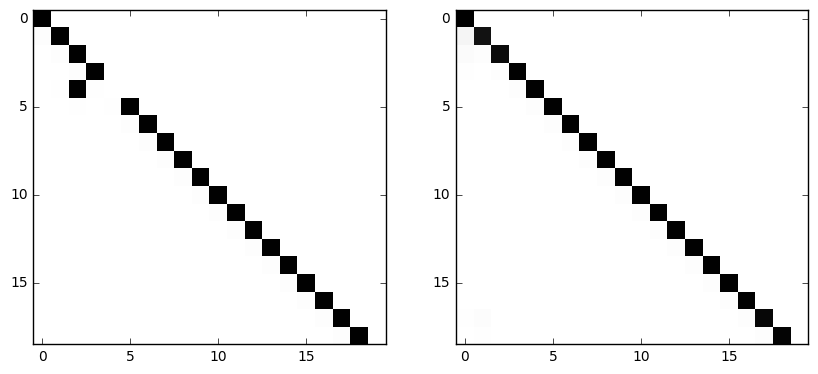

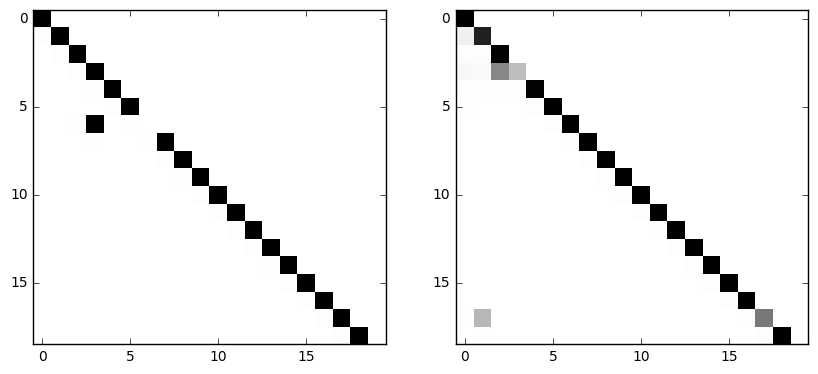

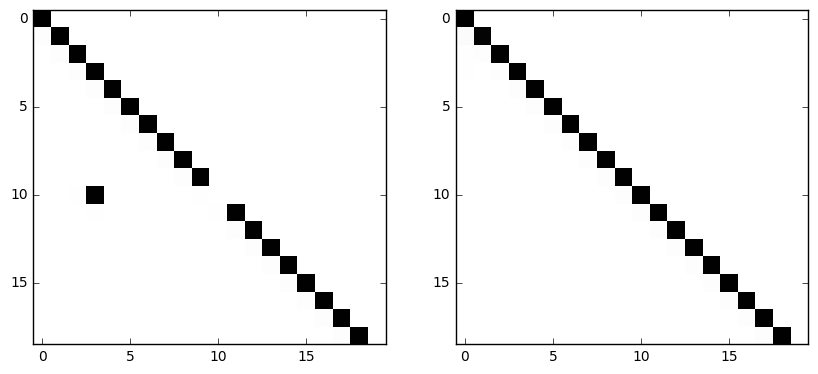

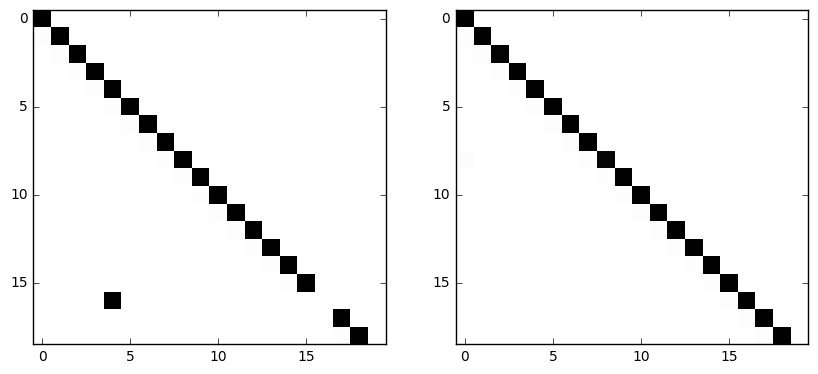

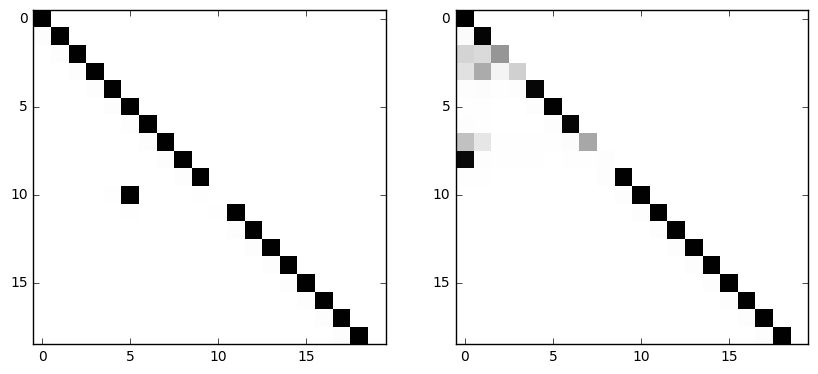

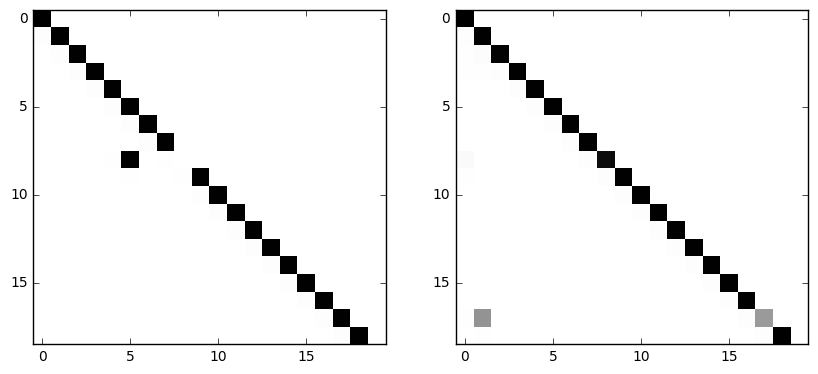

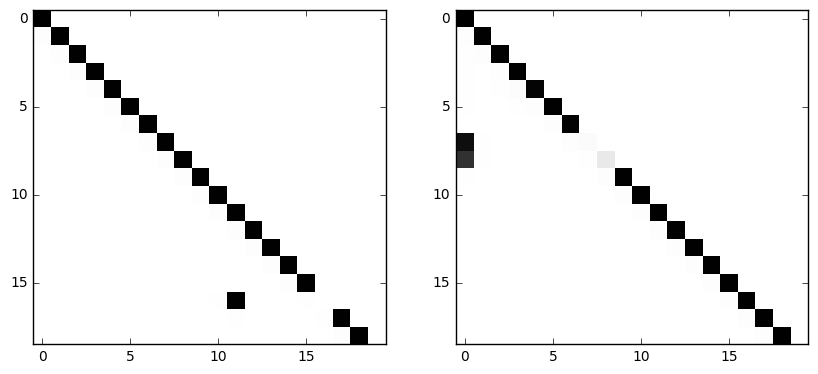

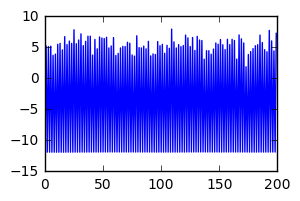

    After 100 iterations
        Discriminator Loss                         = 5.21844434738
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.51861047745
151


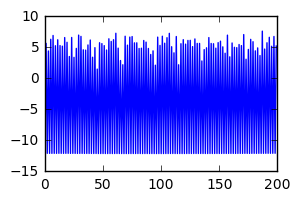

    After 100 iterations
        Discriminator Loss                         = 6.71074295044
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.32185387611
152


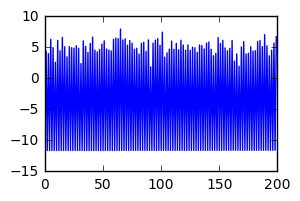

    After 100 iterations
        Discriminator Loss                         = 4.49999570847
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.47163295746
153


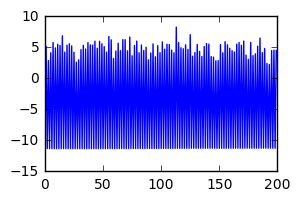

    After 100 iterations
        Discriminator Loss                         = 3.6575729847
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.04133462906
154


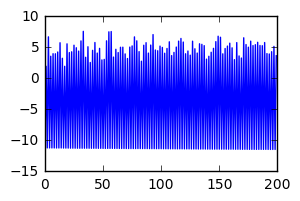

    After 100 iterations
        Discriminator Loss                         = 4.26061487198
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.24578762054
155


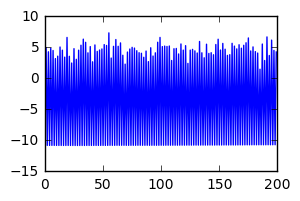

    After 100 iterations
        Discriminator Loss                         = 5.60595417023
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.73206949234
156


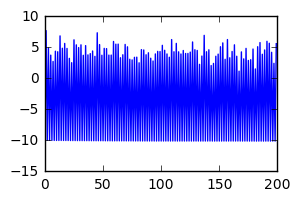

    After 100 iterations
        Discriminator Loss                         = 2.95784044266
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.75648641586
157


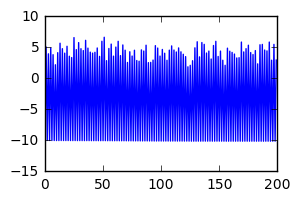

    After 100 iterations
        Discriminator Loss                         = 4.90289258957
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.78870201111
158


    After 100 iterations
        Discriminator Loss                         = 5.88821983337
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.10566902161
159


    After 100 iterations
        Discriminator Loss                         = 4.2548122406
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.45149040222
160


    After 100 iterations
        Discriminator Loss                         = 4.91382312775
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.62727689743
161


    After 100 iterations
        Discriminator Loss                         = 4.24169206619
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.08211088181
162


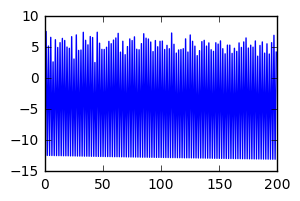

    After 100 iterations
        Discriminator Loss                         = 6.1991109848
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.74621725082
163


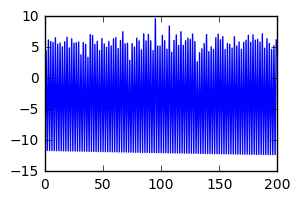

    After 100 iterations
        Discriminator Loss                         = 7.92880725861
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -7.50544691086
164


    After 100 iterations
        Discriminator Loss                         = 9.5930929184
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -7.54059076309
165


    After 100 iterations
        Discriminator Loss                         = 7.8319849968
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -9.119972229
166


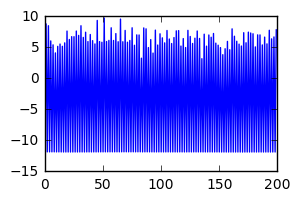

    After 100 iterations
        Discriminator Loss                         = 4.14023780823
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.84111309052
167


    After 100 iterations
        Discriminator Loss                         = 8.47061634064
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.30490922928
168


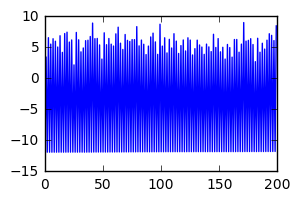

    After 100 iterations
        Discriminator Loss                         = 6.43823623657
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.61555600166
169


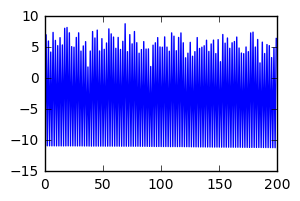

    After 100 iterations
        Discriminator Loss                         = 5.76684904099
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.50354194641
170


    After 100 iterations
        Discriminator Loss                         = 6.35930252075
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.7335190773
171


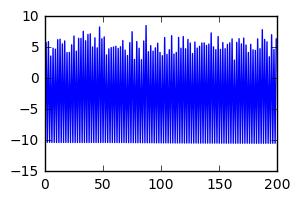

    After 100 iterations
        Discriminator Loss                         = 4.35963106155
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.91269207001
172


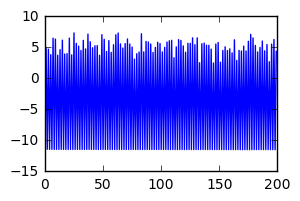

    After 100 iterations
        Discriminator Loss                         = 4.75517606735
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -6.72808122635
173


    After 100 iterations
        Discriminator Loss                         = 6.40808963776
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.47549247742
174


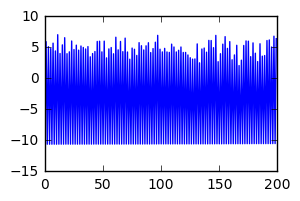

    After 100 iterations
        Discriminator Loss                         = 3.4072394371
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.65689659119
175
     Level #0 Epoch #0 Batch #175


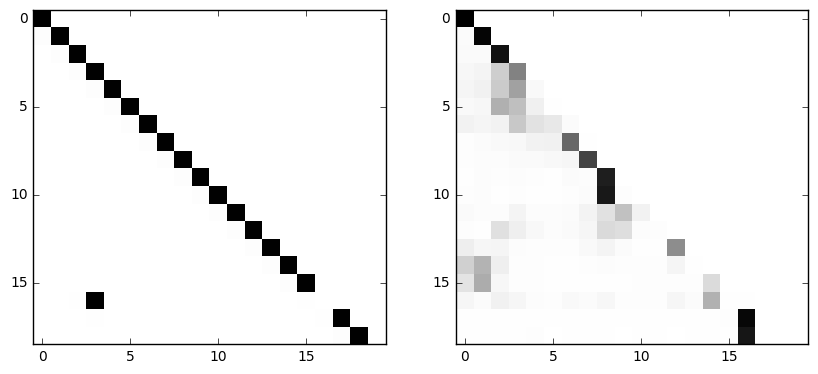

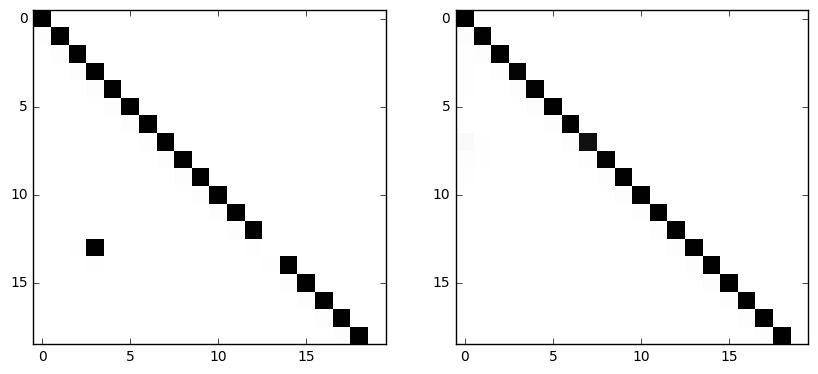

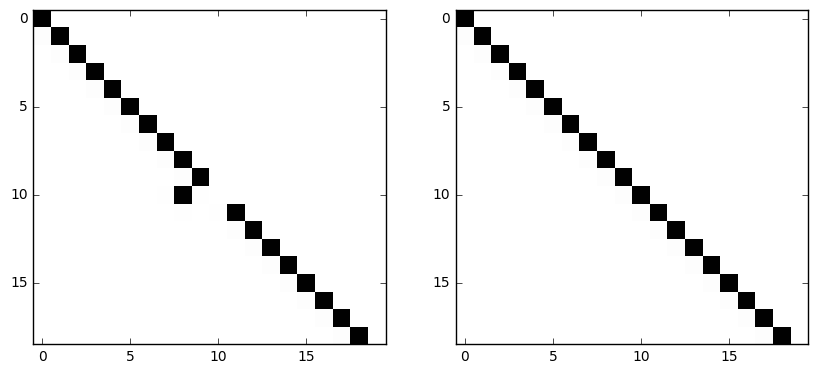

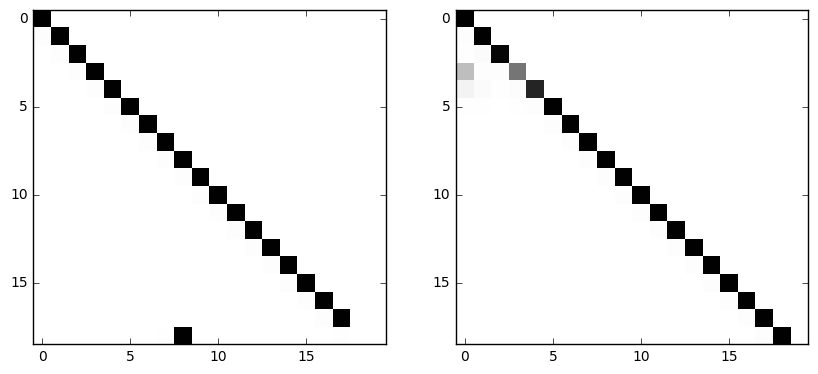

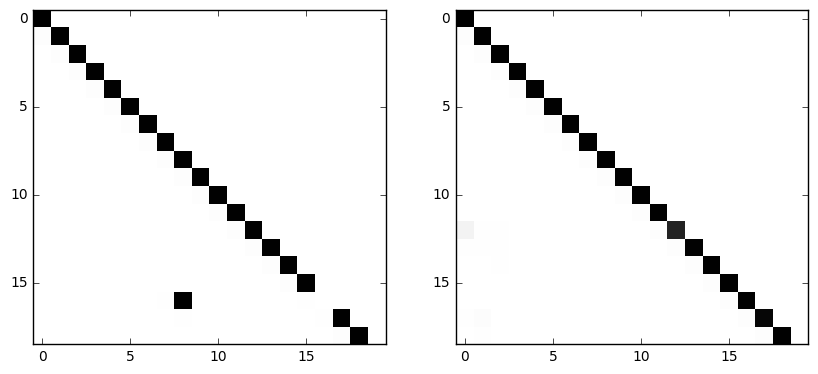

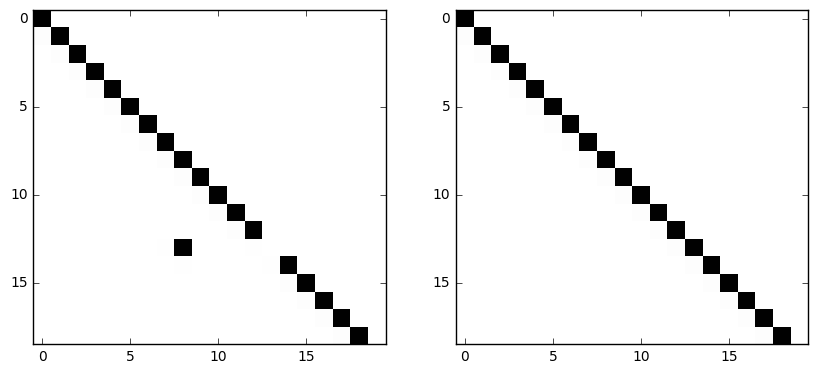

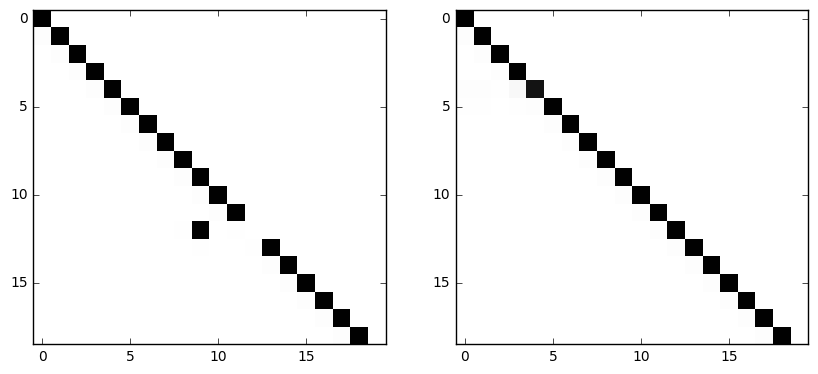

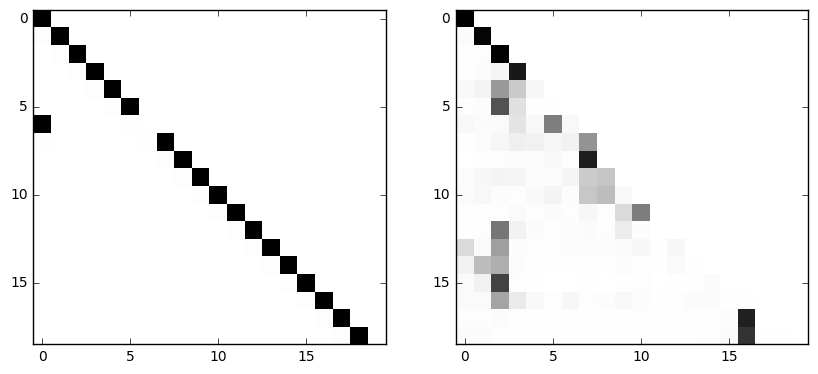

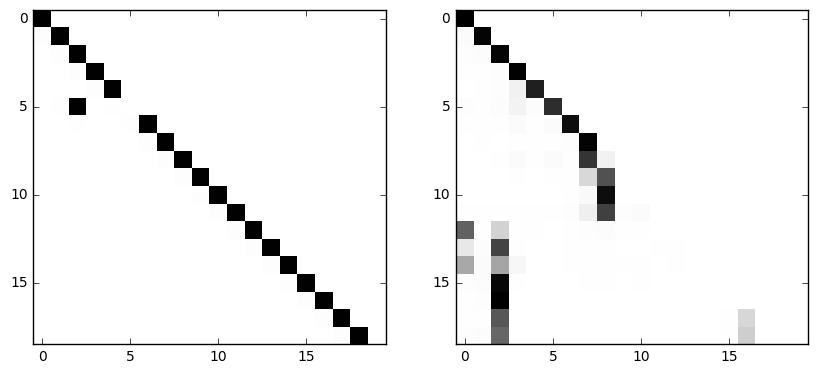

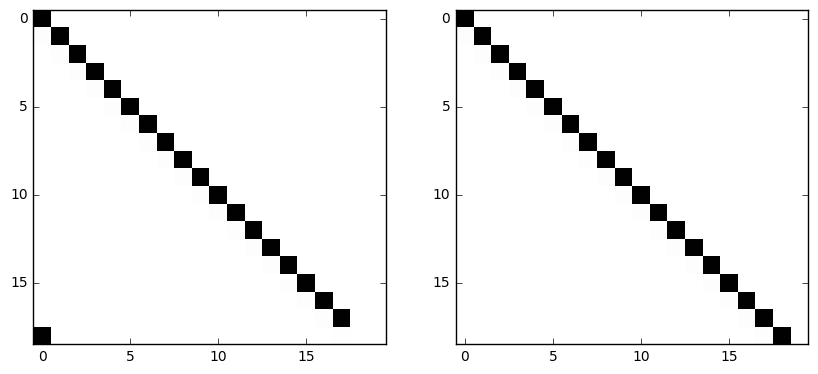

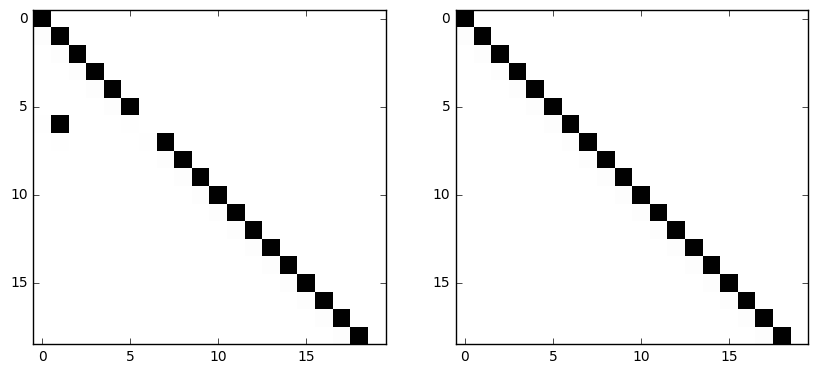

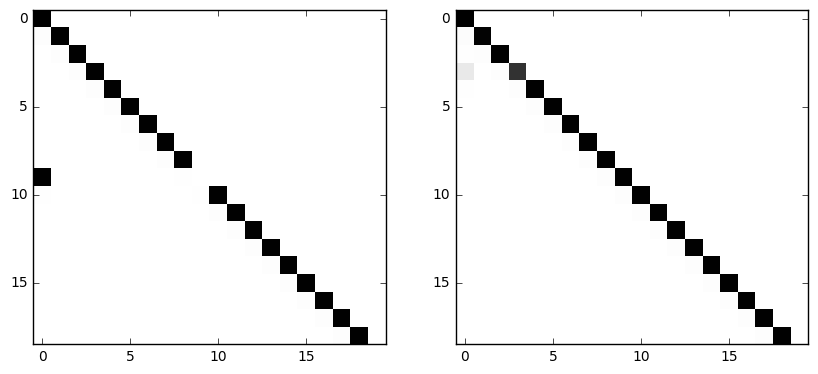

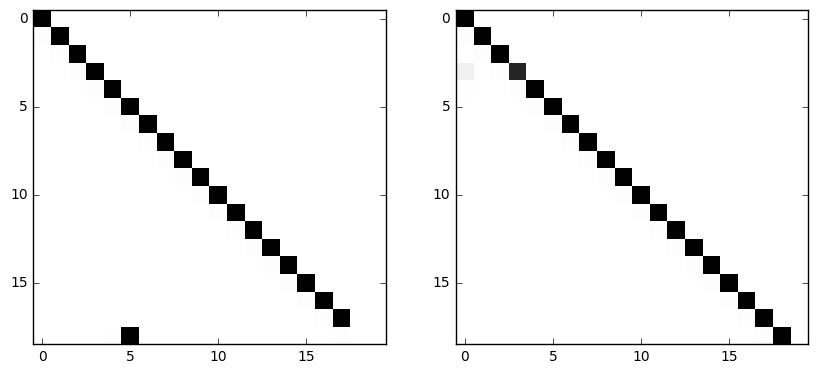

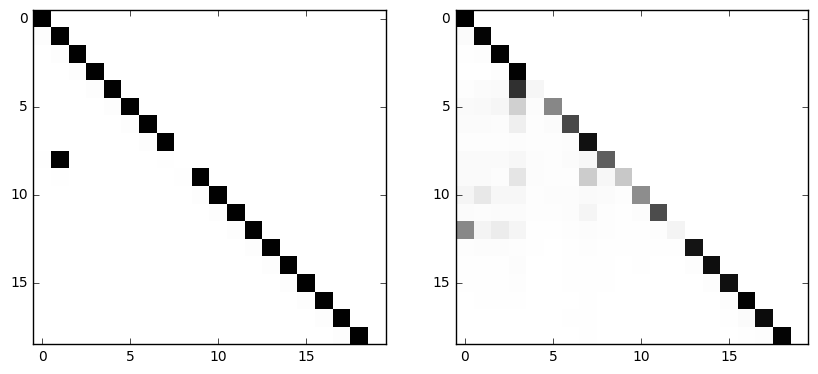

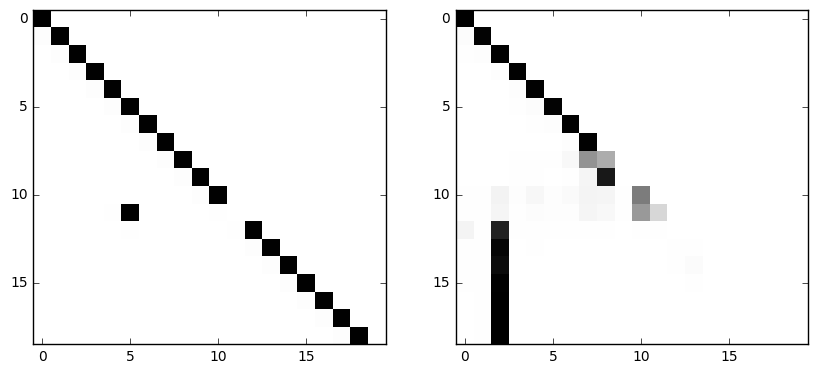

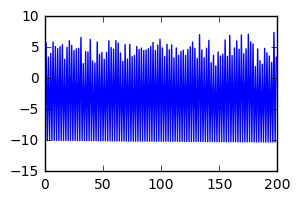

    After 100 iterations
        Discriminator Loss                         = 3.81287741661
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.20764255524
176


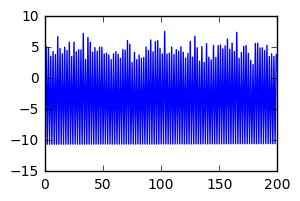

    After 100 iterations
        Discriminator Loss                         = 4.28552532196
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.84683609009
177


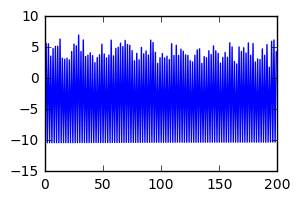

    After 100 iterations
        Discriminator Loss                         = 7.55121707916
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.58231925964
178


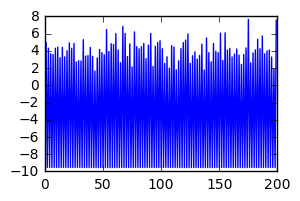

    After 100 iterations
        Discriminator Loss                         = 4.44525766373
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.85520744324
179


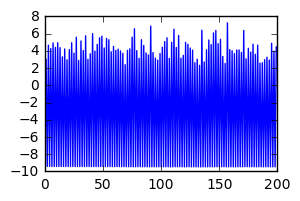

    After 100 iterations
        Discriminator Loss                         = 3.89276981354
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.80544376373
180


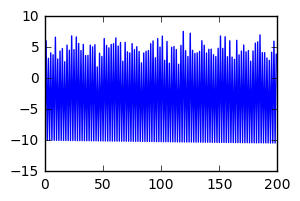

    After 100 iterations
        Discriminator Loss                         = 4.30939817429
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.63828802109
181


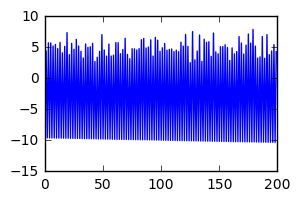

    After 100 iterations
        Discriminator Loss                         = 4.90489339828
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.67522525787
182


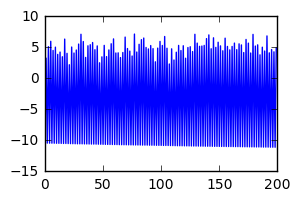

    After 100 iterations
        Discriminator Loss                         = 5.06185626984
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.24175262451
183


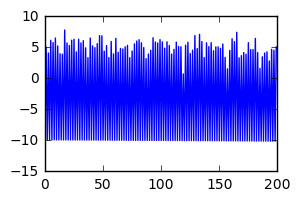

    After 100 iterations
        Discriminator Loss                         = 5.76280498505
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.97272562981
184


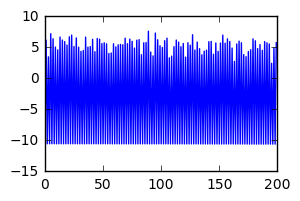

    After 100 iterations
        Discriminator Loss                         = 6.07907056808
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.1252322197
185


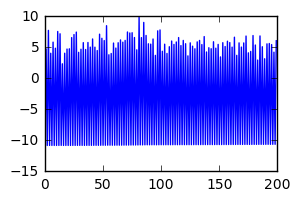

    After 100 iterations
        Discriminator Loss                         = 4.33464050293
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.67405128479
186


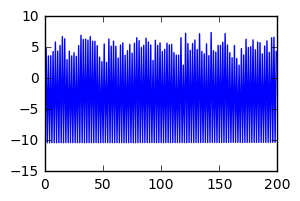

    After 100 iterations
        Discriminator Loss                         = 4.62886667252
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.44770860672
187


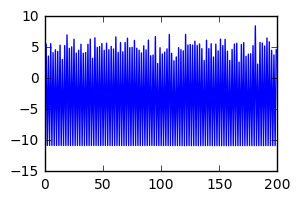

    After 100 iterations
        Discriminator Loss                         = 7.55080127716
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.75693631172
188


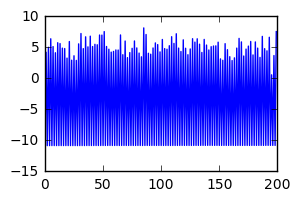

    After 100 iterations
        Discriminator Loss                         = 5.35231685638
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.44335889816
189


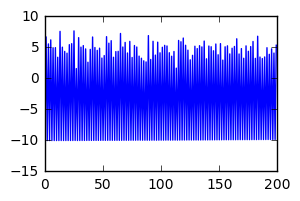

    After 100 iterations
        Discriminator Loss                         = 3.38137745857
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.72602701187
190


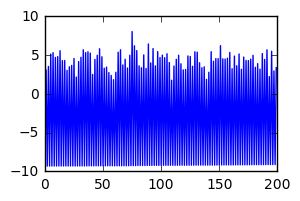

    After 100 iterations
        Discriminator Loss                         = 4.37514686584
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.18558216095
191


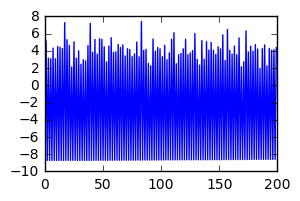

    After 100 iterations
        Discriminator Loss                         = 3.04524517059
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.51387786865
192


    After 100 iterations
        Discriminator Loss                         = 5.71052646637
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.12596130371
193


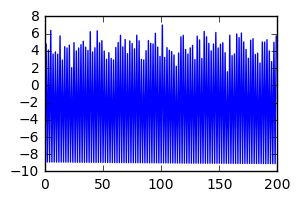

    After 100 iterations
        Discriminator Loss                         = 4.48853969574
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.22145342827
194


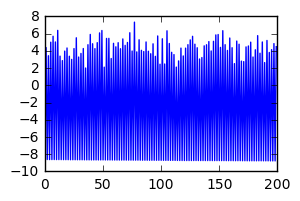

    After 100 iterations
        Discriminator Loss                         = 3.11029076576
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.3054497242
195


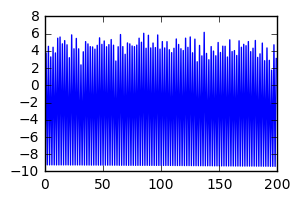

    After 100 iterations
        Discriminator Loss                         = 3.2353541851
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.63636636734
196


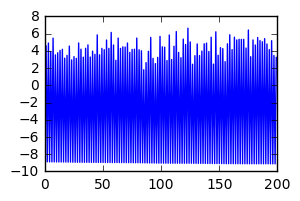

    After 100 iterations
        Discriminator Loss                         = 5.27610492706
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.35044527054
197


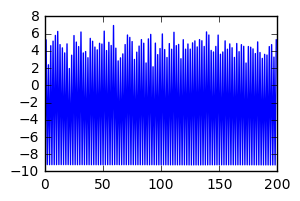

    After 100 iterations
        Discriminator Loss                         = 4.14262199402
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.66017603874
198


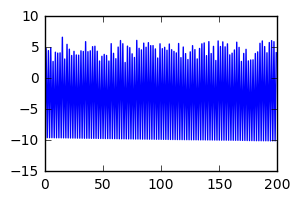

    After 100 iterations
        Discriminator Loss                         = 3.22853684425
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.89893603325
199


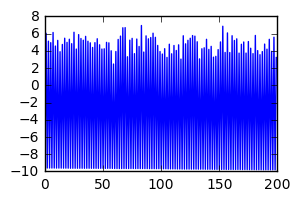

    After 100 iterations
        Discriminator Loss                         = 5.14857435226
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.49141740799
200
     Level #0 Epoch #0 Batch #200


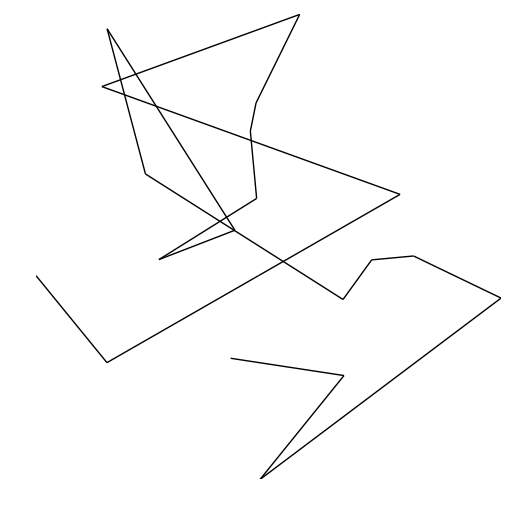

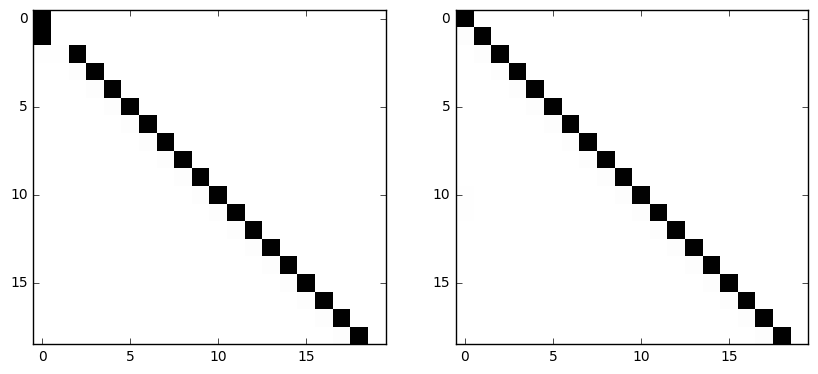

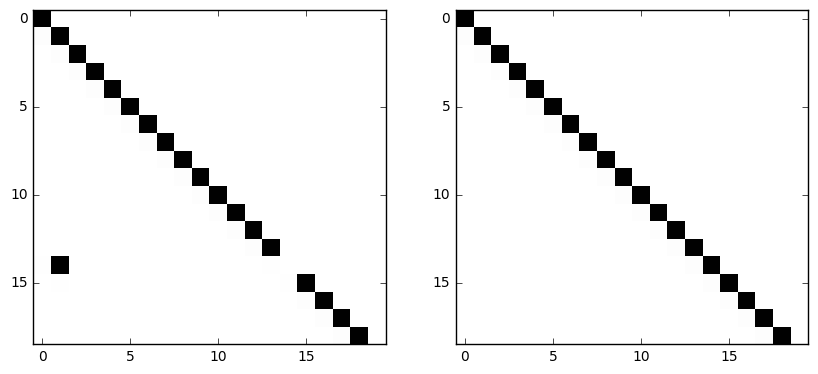

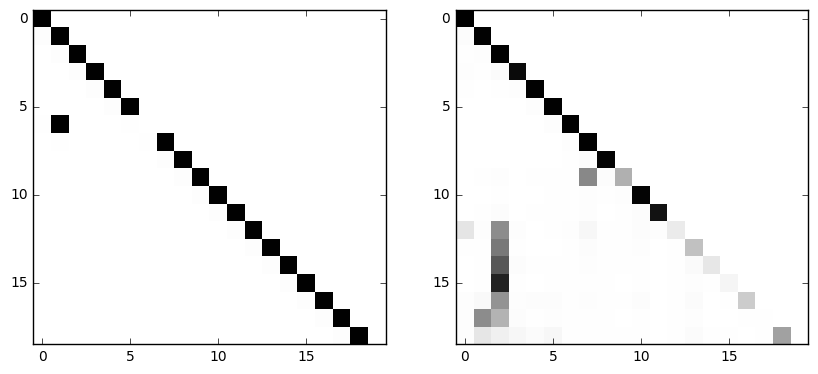

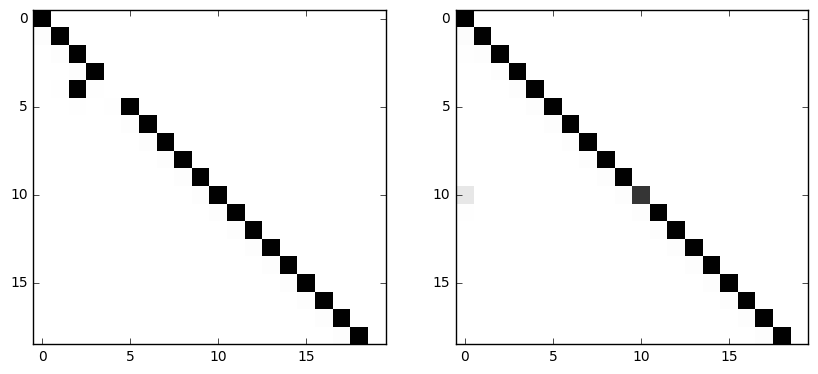

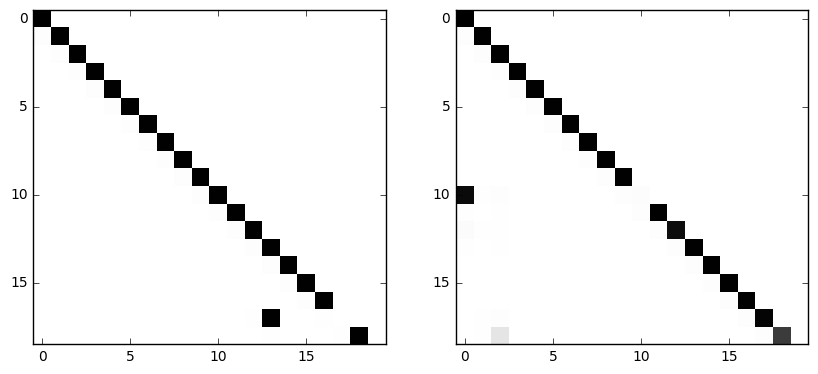

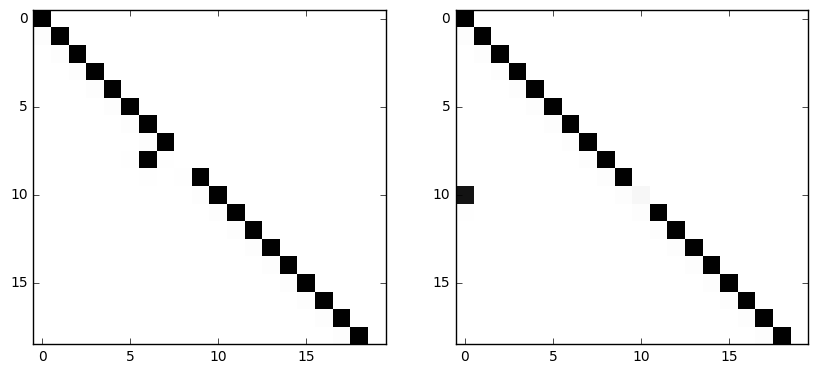

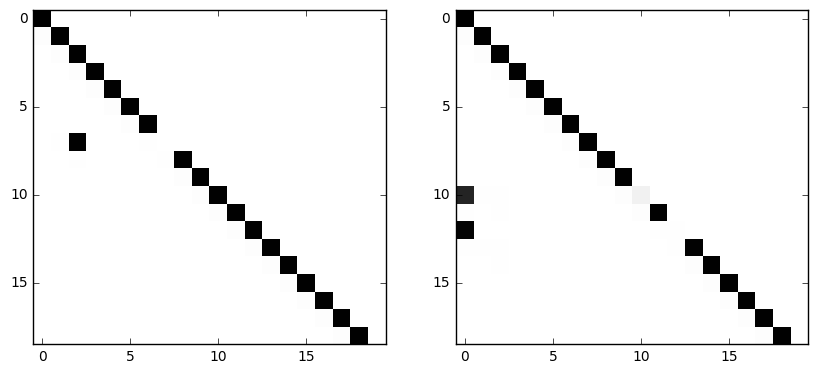

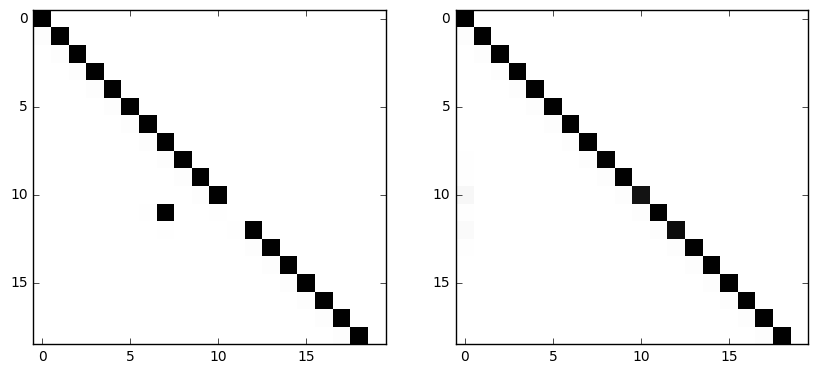

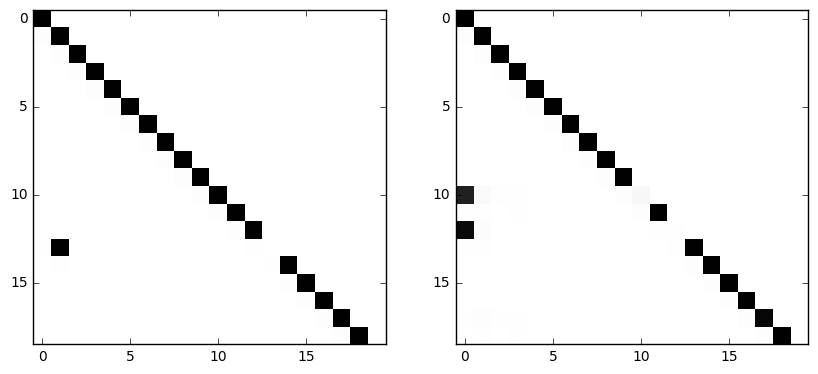

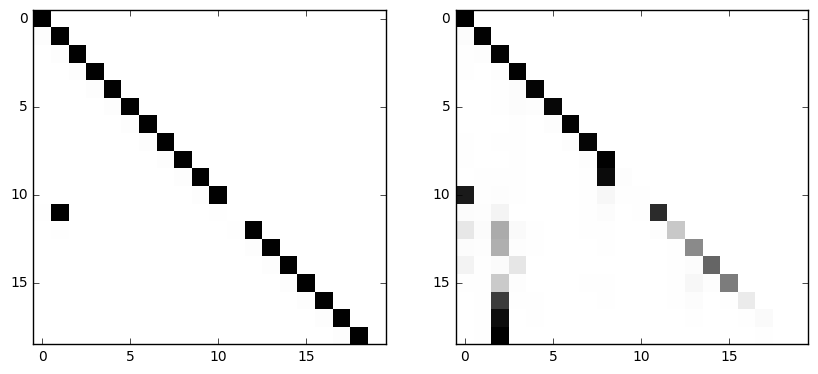

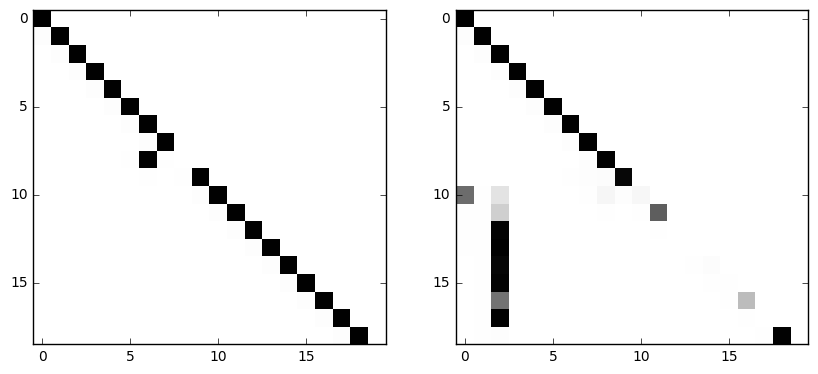

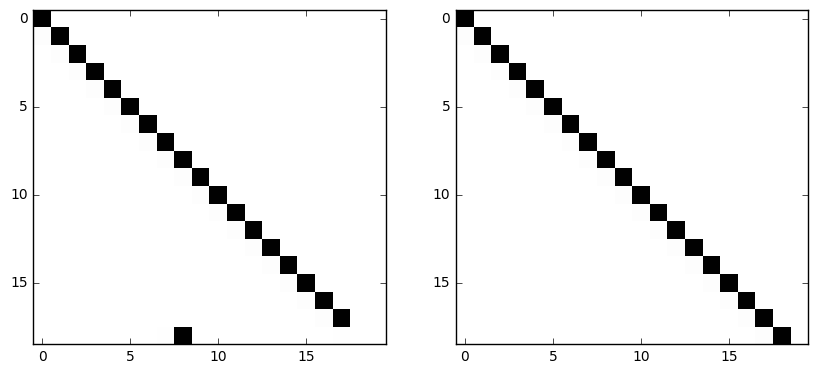

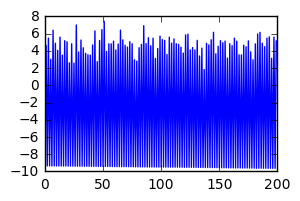

    After 100 iterations
        Discriminator Loss                         = 4.49558162689
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.84812402725
201


    After 100 iterations
        Discriminator Loss                         = 4.75690984726
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.73360586166
202


    After 100 iterations
        Discriminator Loss                         = 5.81185531616
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.76163673401
203


    After 100 iterations
        Discriminator Loss                         = 3.38076424599
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.61617898941
204


    After 100 iterations
        Discriminator Loss                         = 3.86400032043
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.4464931488
205


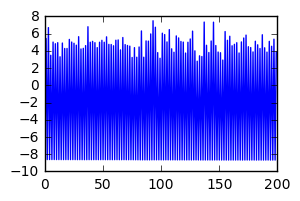

    After 100 iterations
        Discriminator Loss                         = 3.99475860596
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.64445376396
206


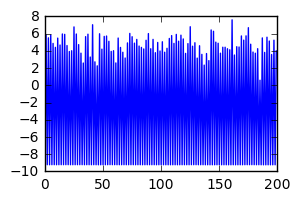

    After 100 iterations
        Discriminator Loss                         = 4.64552688599
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.84126186371
207


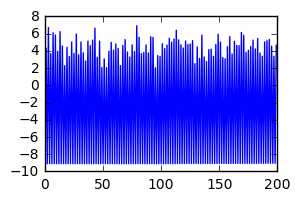

    After 100 iterations
        Discriminator Loss                         = 2.92700576782
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.28549480438
208


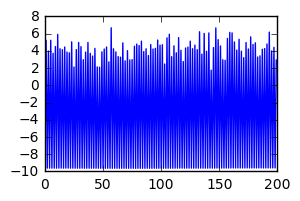

    After 100 iterations
        Discriminator Loss                         = 5.9352645874
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -5.00436067581
209


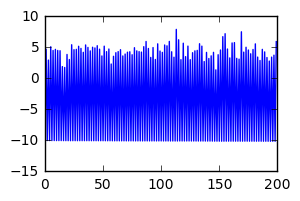

    After 100 iterations
        Discriminator Loss                         = 5.22075462341
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.81797099113
210


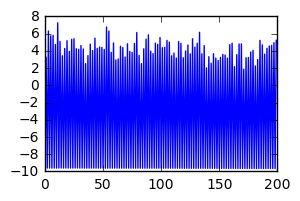

    After 100 iterations
        Discriminator Loss                         = 3.2713124752
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.0639834404
211


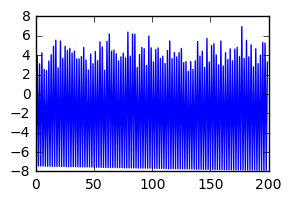

    After 100 iterations
        Discriminator Loss                         = 3.48240184784
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.95233416557
212


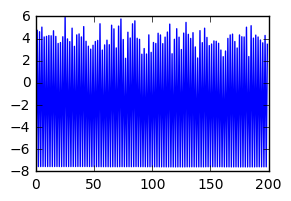

    After 100 iterations
        Discriminator Loss                         = 2.93000006676
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.17621207237
213


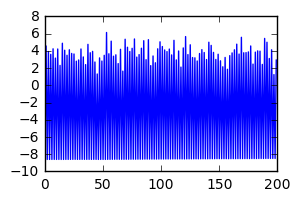

    After 100 iterations
        Discriminator Loss                         = 2.37065577507
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.25104296207
214


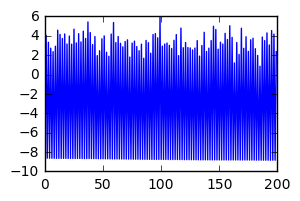

    After 100 iterations
        Discriminator Loss                         = 2.97657847404
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.21036481857
215


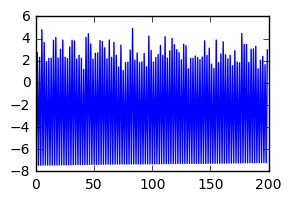

    After 100 iterations
        Discriminator Loss                         = 2.14568018913
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.551669478416
216


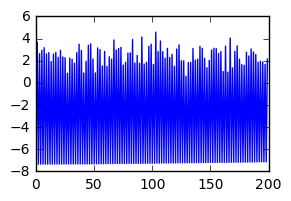

    After 100 iterations
        Discriminator Loss                         = 0.942116320133
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.878564715385
217


    After 100 iterations
        Discriminator Loss                         = 1.37132501602
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.53456163406
218


    After 100 iterations
        Discriminator Loss                         = 3.39193868637
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.4605755806
219


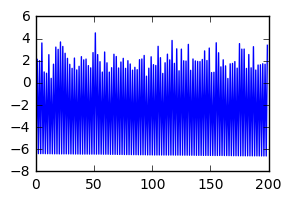

    After 100 iterations
        Discriminator Loss                         = 1.76509857178
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.14820075035
220


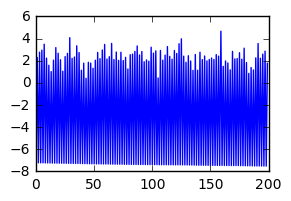

    After 100 iterations
        Discriminator Loss                         = 1.6958117485
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.82971930504
221


    After 100 iterations
        Discriminator Loss                         = 2.76420378685
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.34679794312
222


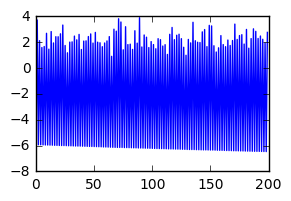

    After 100 iterations
        Discriminator Loss                         = 2.41469955444
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.83226895332
223


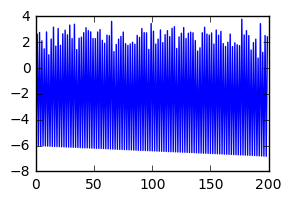

    After 100 iterations
        Discriminator Loss                         = 3.10918593407
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.56384563446
224


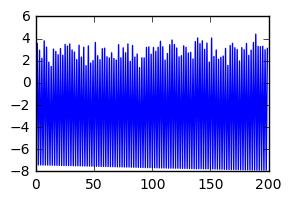

    After 100 iterations
        Discriminator Loss                         = 4.02901983261
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.64104413986
225
     Level #0 Epoch #0 Batch #225


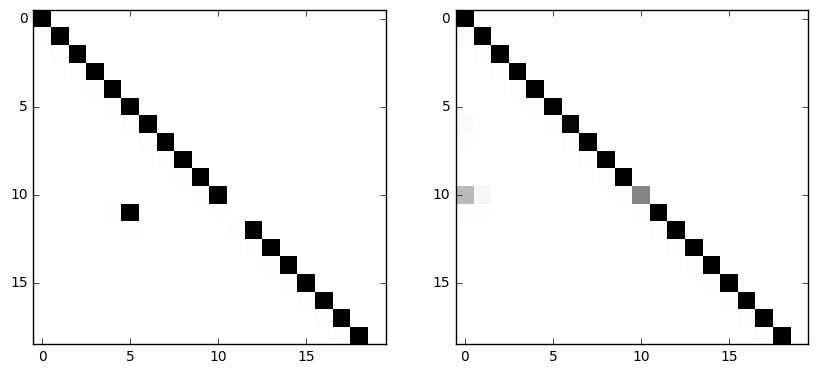

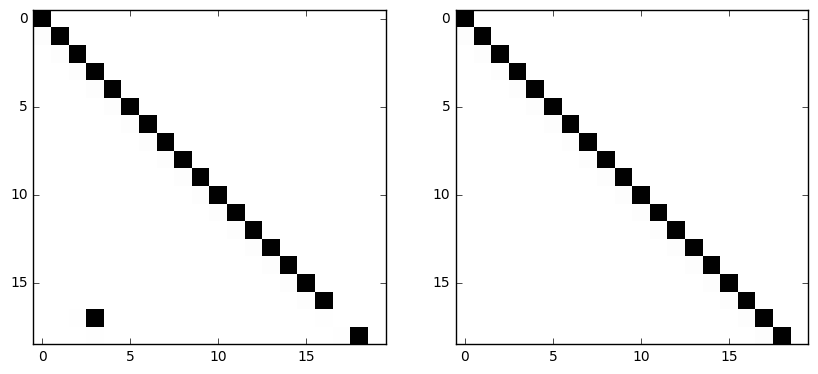

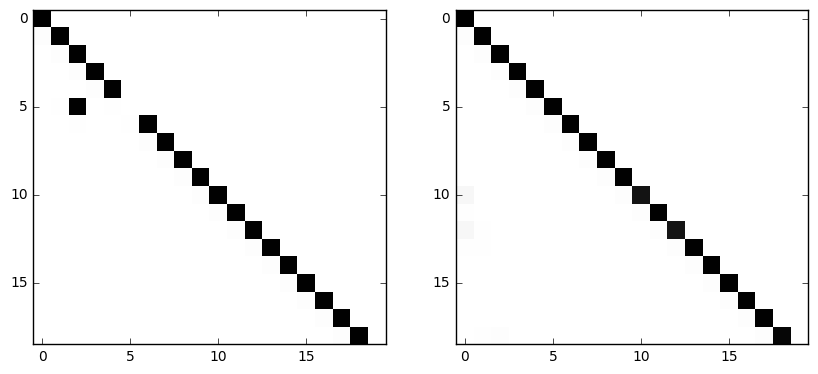

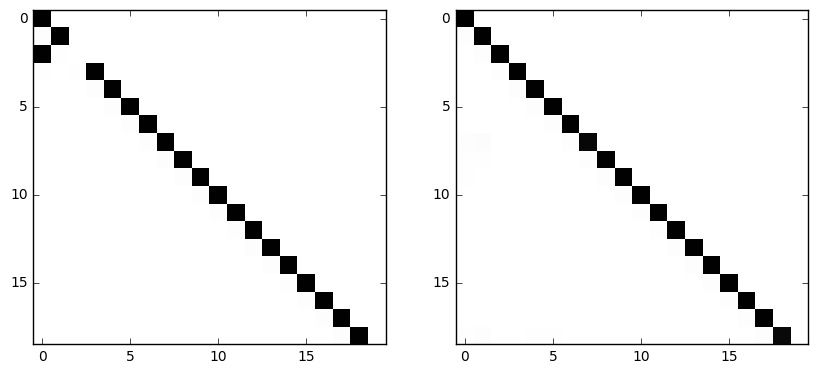

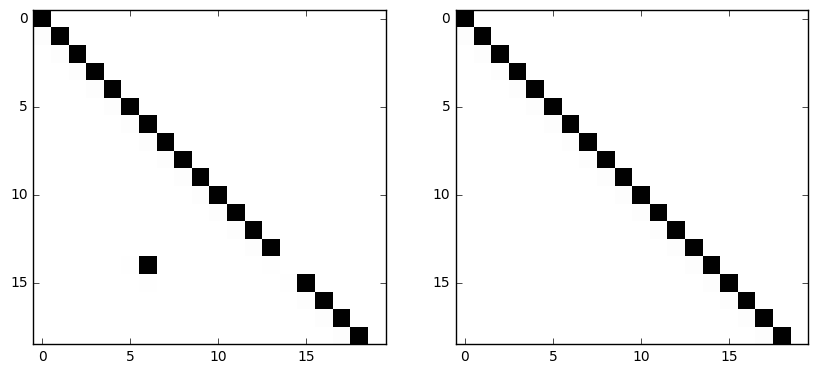

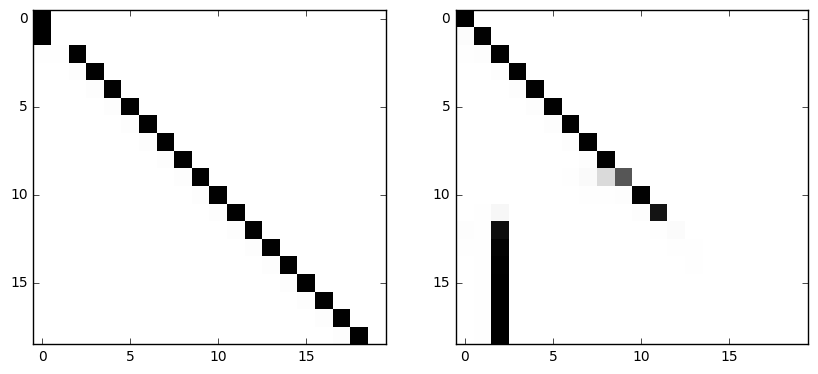

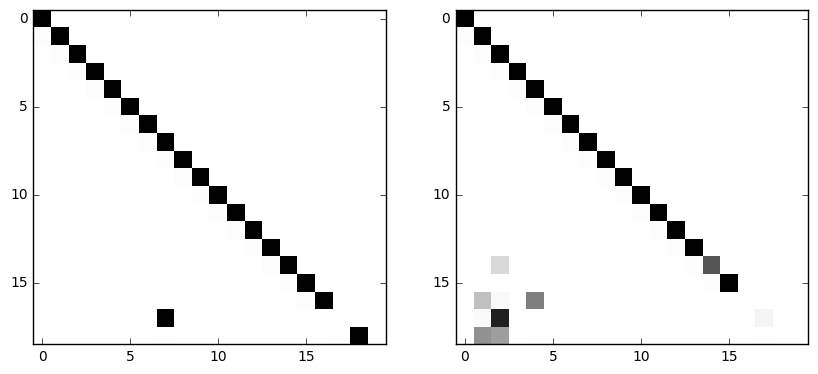

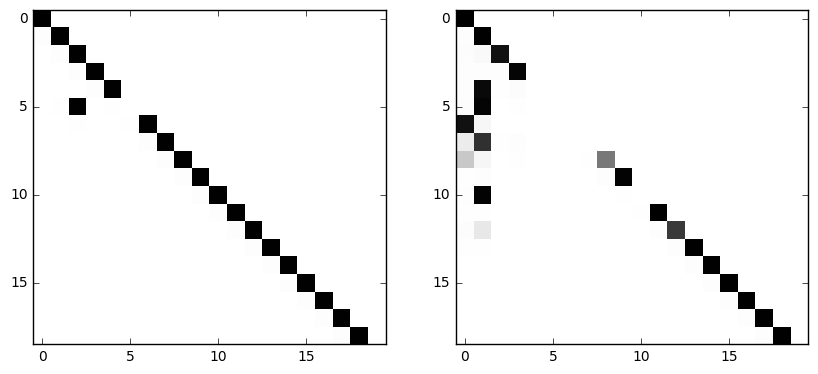

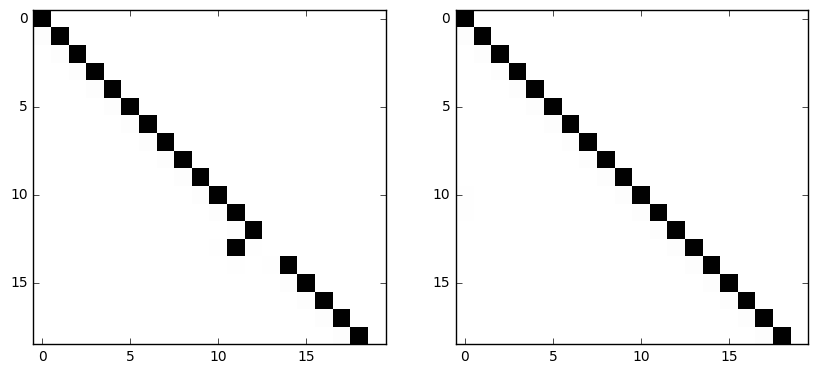

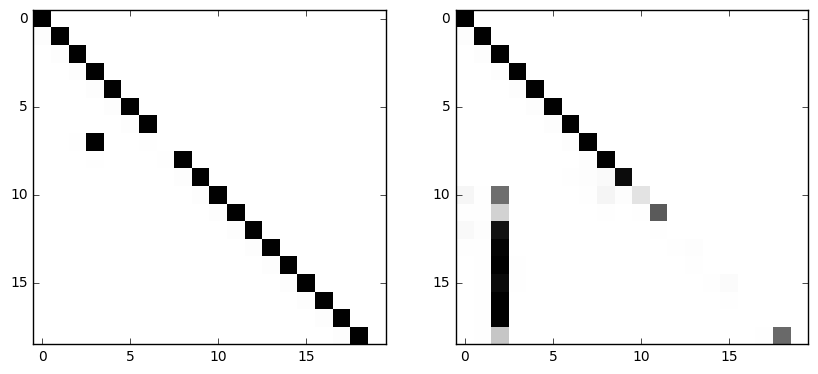

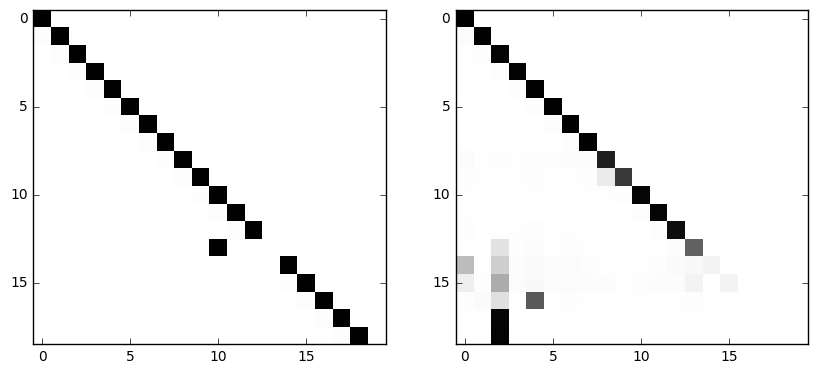

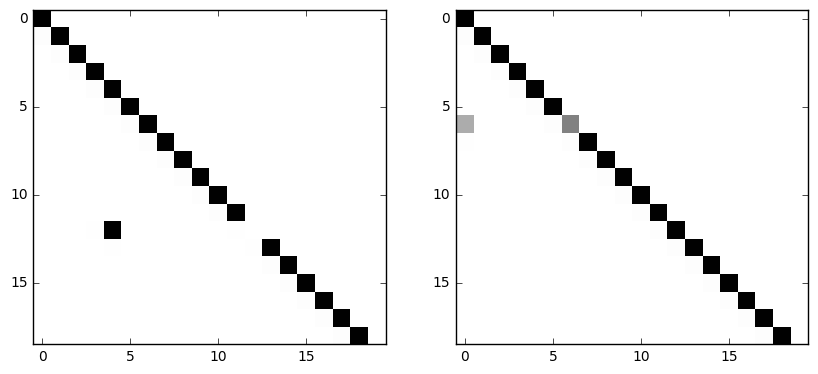

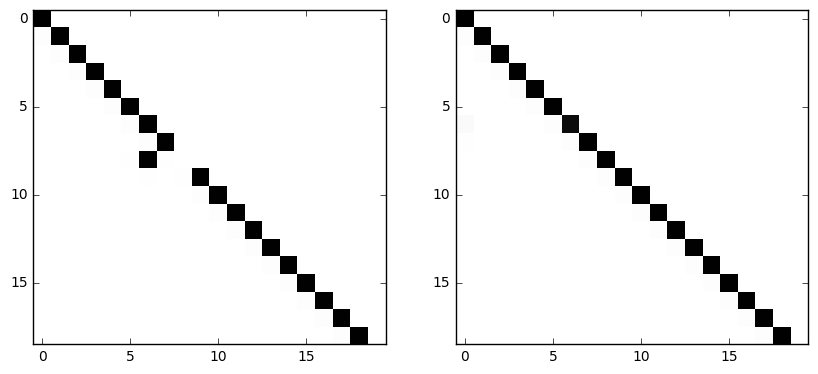

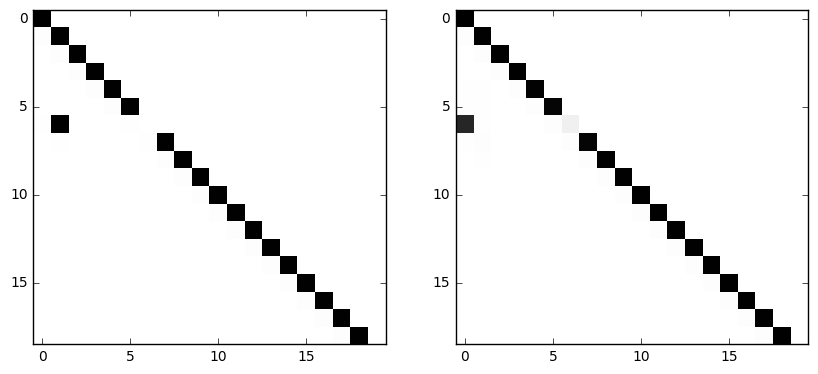

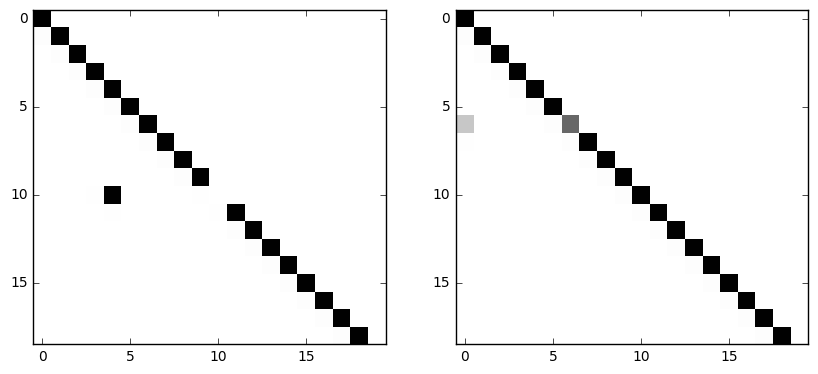

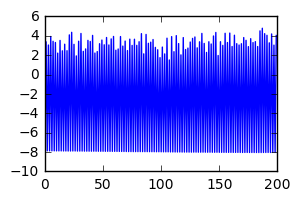

    After 100 iterations
        Discriminator Loss                         = 1.96697771549
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.92153072357
226


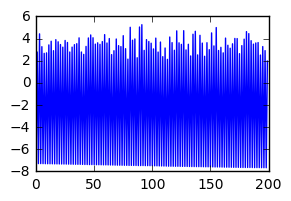

    After 100 iterations
        Discriminator Loss                         = 3.1109995842
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -4.16193437576
227


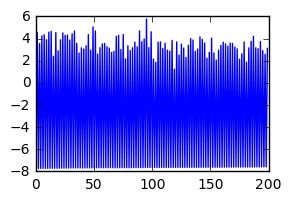

    After 100 iterations
        Discriminator Loss                         = 4.00213956833
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.95680236816
228


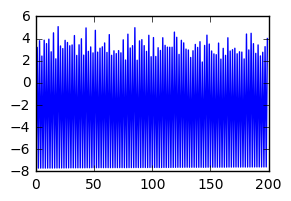

    After 100 iterations
        Discriminator Loss                         = 2.09274506569
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -3.1954035759
229


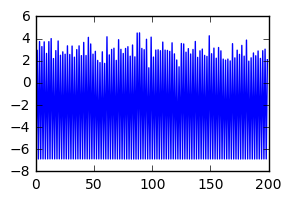

    After 100 iterations
        Discriminator Loss                         = 2.32031679153
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.923569083214
230


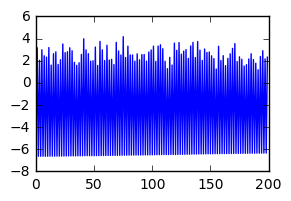

    After 100 iterations
        Discriminator Loss                         = 1.4786233902
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.39684820175
231


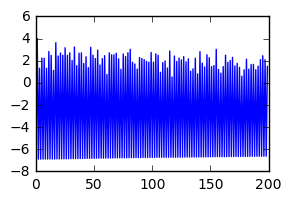

    After 100 iterations
        Discriminator Loss                         = 0.713321328163
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.33035349846
232


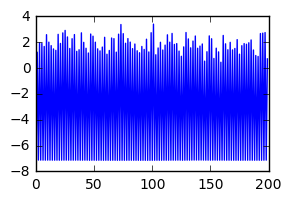

    After 100 iterations
        Discriminator Loss                         = 1.29917490482
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.906607866287
233


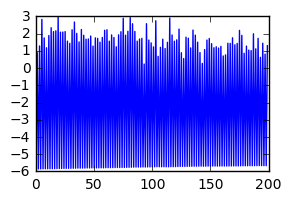

    After 100 iterations
        Discriminator Loss                         = 1.65350306034
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.15389108658
234


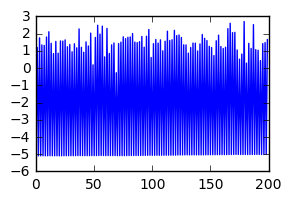

    After 100 iterations
        Discriminator Loss                         = 0.538825571537
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.56188082695
235


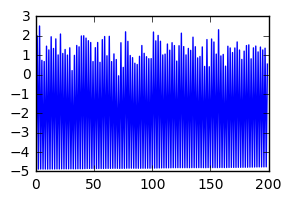

    After 100 iterations
        Discriminator Loss                         = 1.80776202679
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.09180521965
236


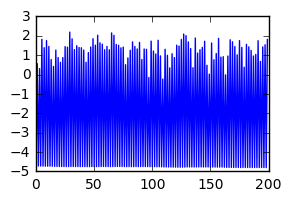

    After 100 iterations
        Discriminator Loss                         = 0.583231210709
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.879770100117
237


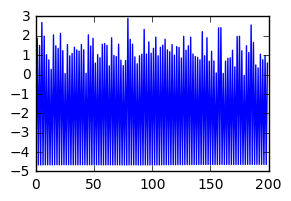

    After 100 iterations
        Discriminator Loss                         = 0.998412668705
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.268471330404
238


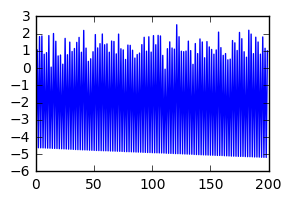

    After 100 iterations
        Discriminator Loss                         = 0.79184037447
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.32194852829
239


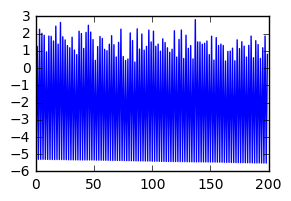

    After 100 iterations
        Discriminator Loss                         = 1.2327247858
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.4483808279
240


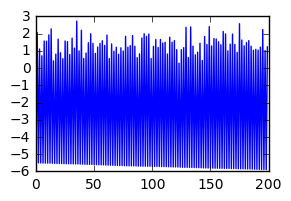

    After 100 iterations
        Discriminator Loss                         = 1.07029938698
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.676894187927
241


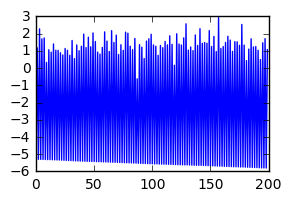

    After 100 iterations
        Discriminator Loss                         = 1.45513379574
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.39196038246
242


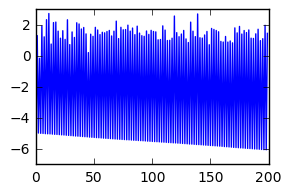

    After 100 iterations
        Discriminator Loss                         = 2.41029882431
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -2.39246630669
243


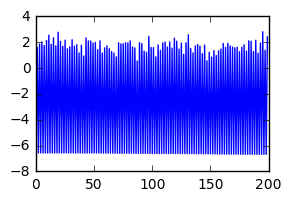

    After 100 iterations
        Discriminator Loss                         = 1.77972745895
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.24933695793
244


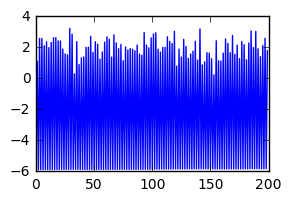

    After 100 iterations
        Discriminator Loss                         = 1.22637009621
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.89235293865
245


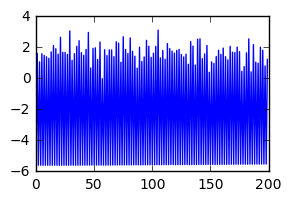

    After 100 iterations
        Discriminator Loss                         = 2.18234539032
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.52023661137
246


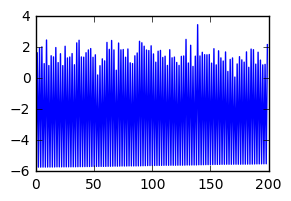

    After 100 iterations
        Discriminator Loss                         = 1.08398389816
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.42106243968
247


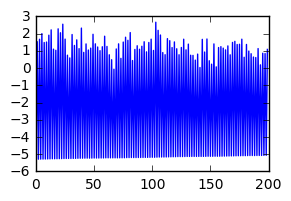

    After 100 iterations
        Discriminator Loss                         = 0.0626721903682
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.1510065794
248


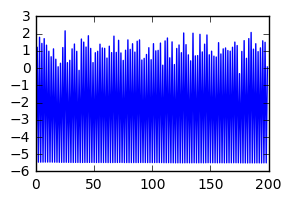

    After 100 iterations
        Discriminator Loss                         = 1.36227965355
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.0819889381528
249


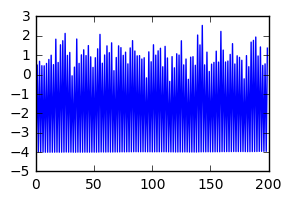

    After 100 iterations
        Discriminator Loss                         = 1.16251897812
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.961253702641
250
     Level #0 Epoch #0 Batch #250


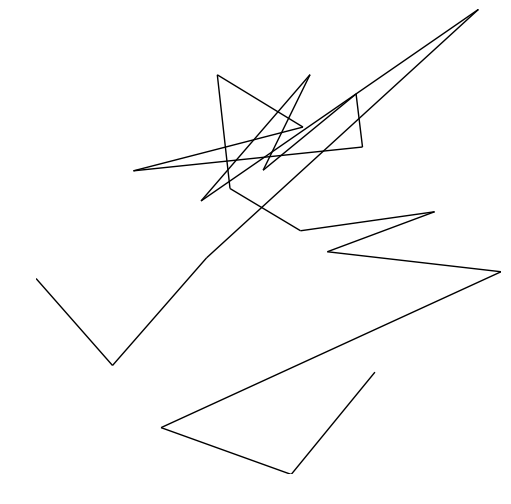

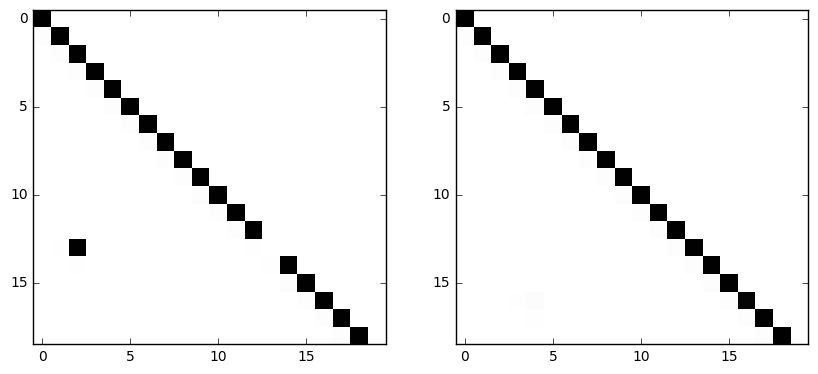

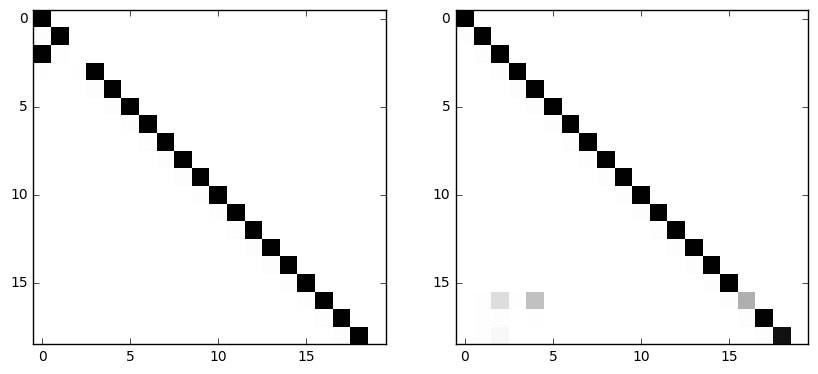

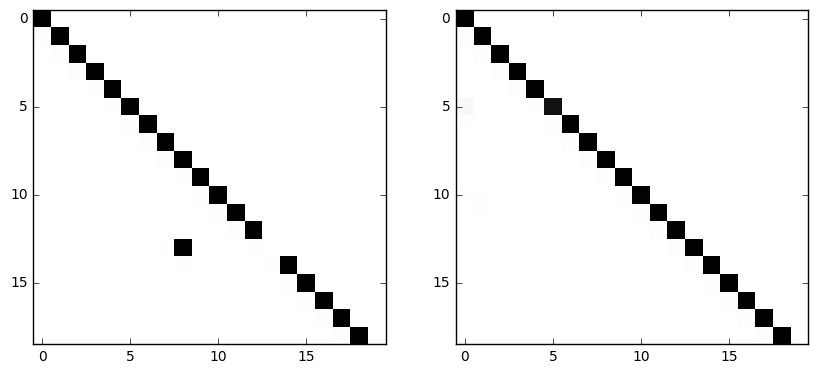

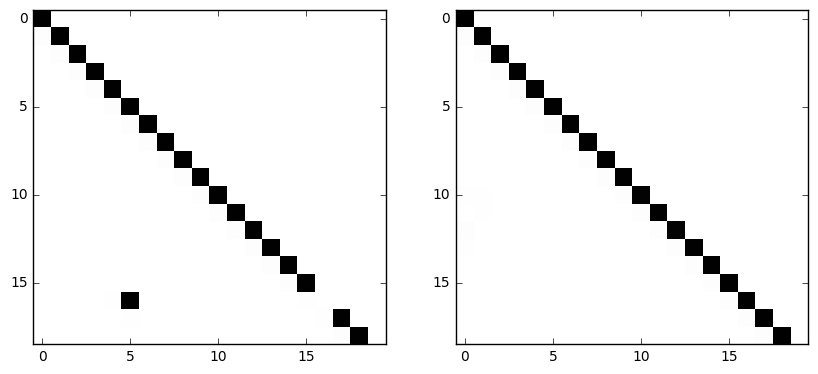

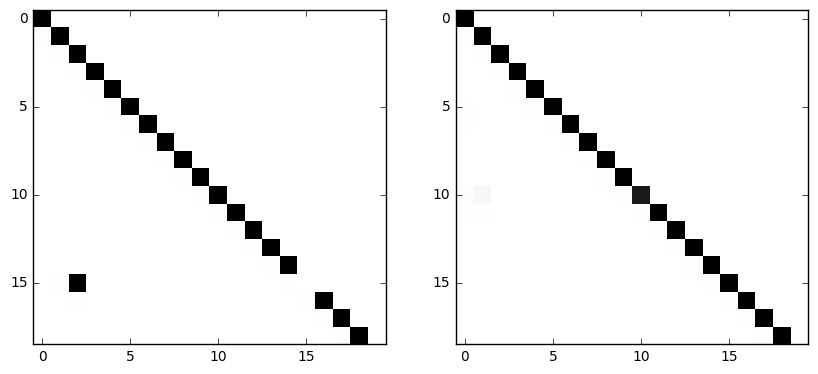

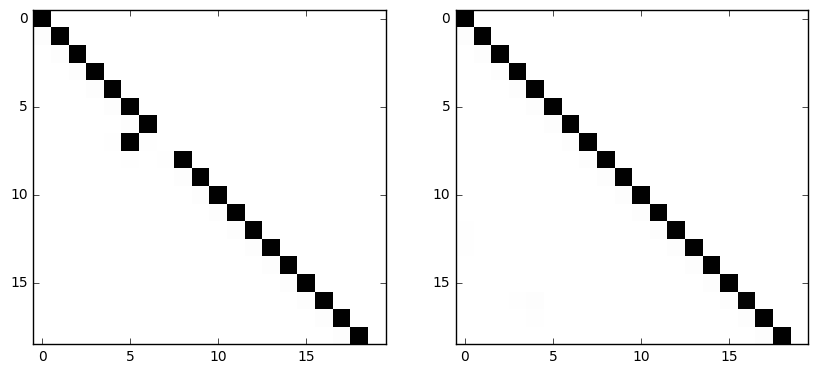

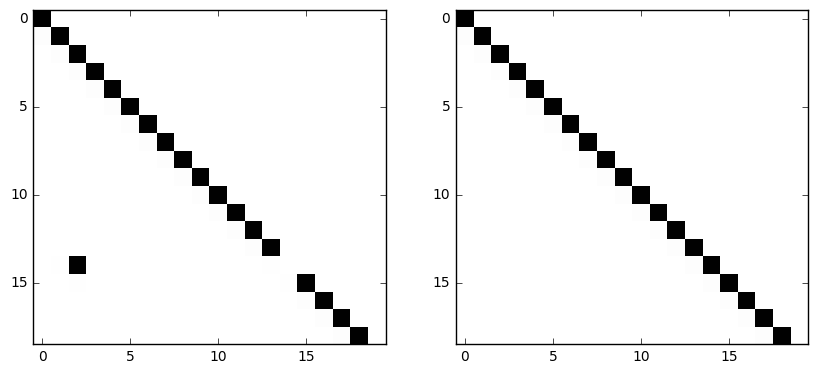

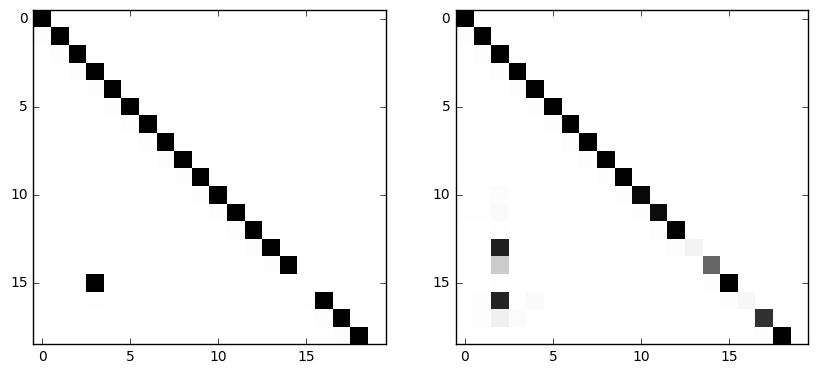

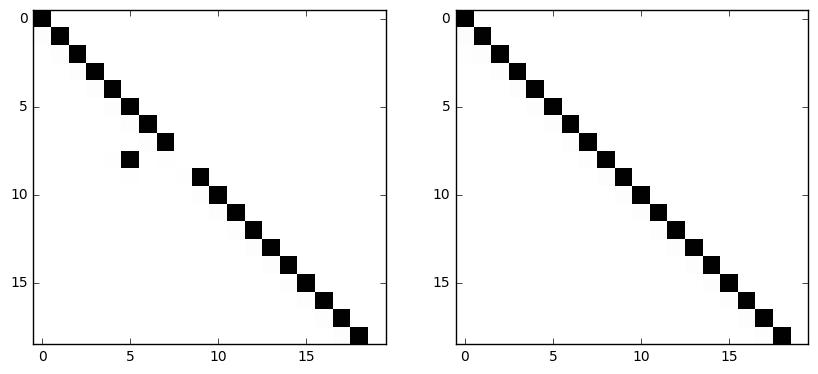

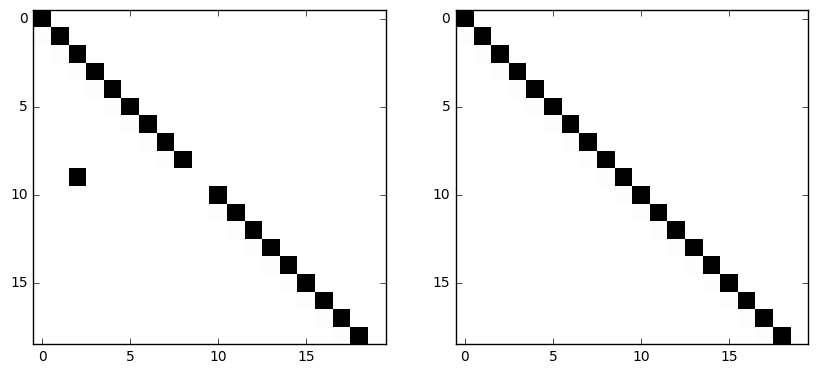

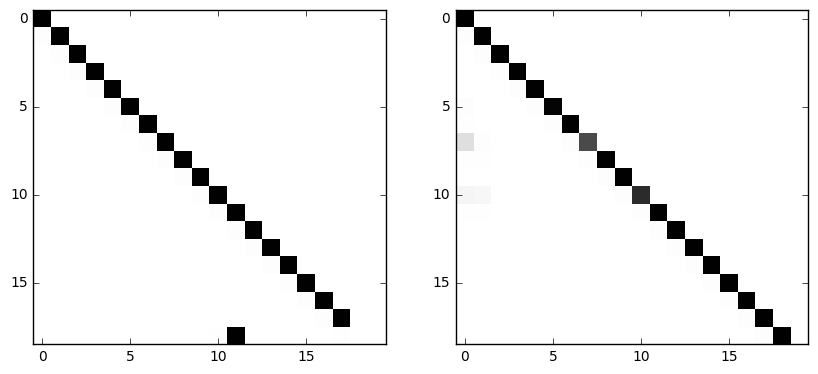

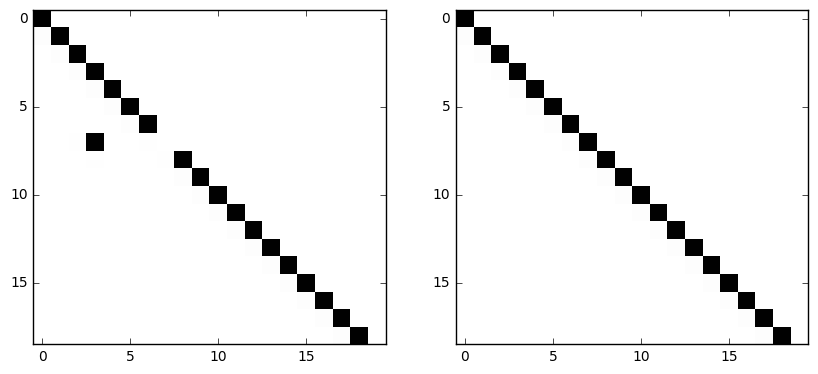

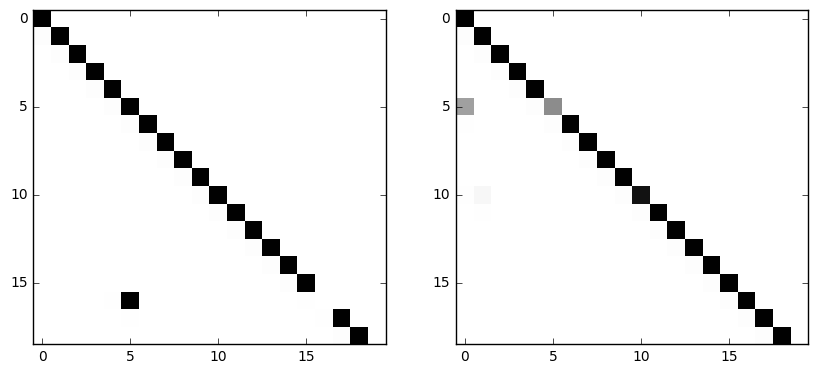

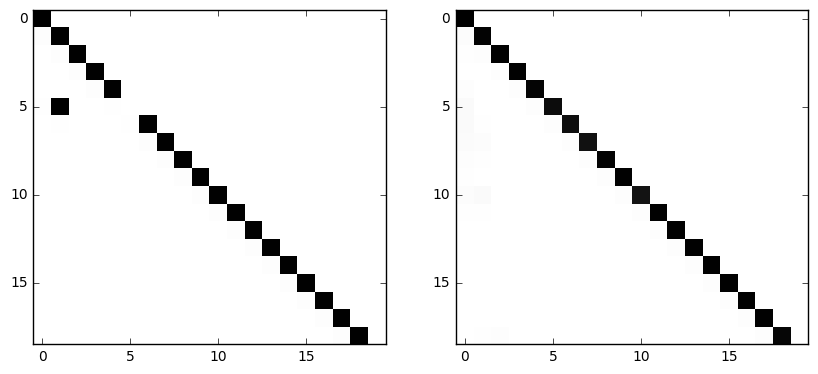

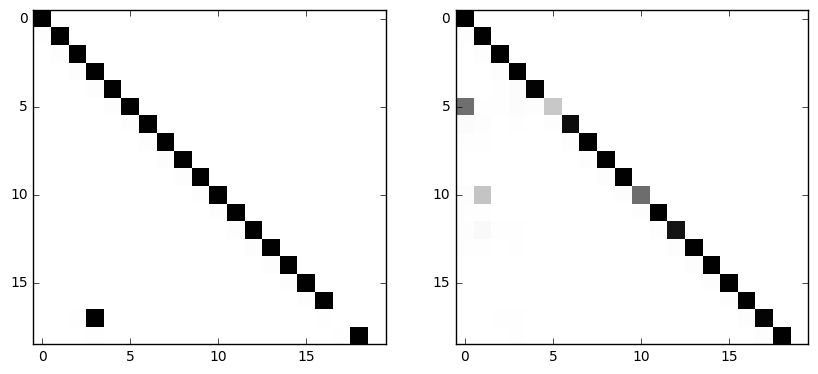

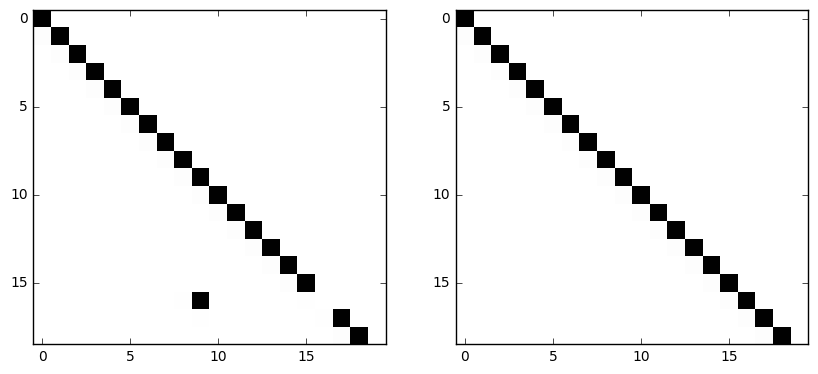

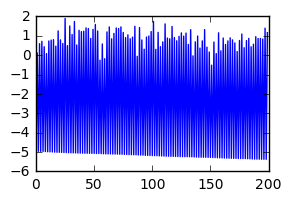

    After 100 iterations
        Discriminator Loss                         = 0.621128618717
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.319411307573
251


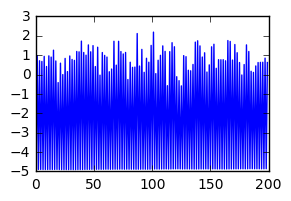

    After 100 iterations
        Discriminator Loss                         = 0.297563463449
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.481817781925
252


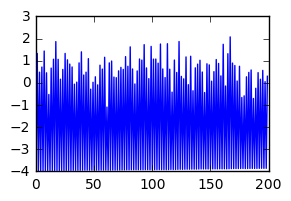

    After 100 iterations
        Discriminator Loss                         = -0.360939413309
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -1.15705180168
253


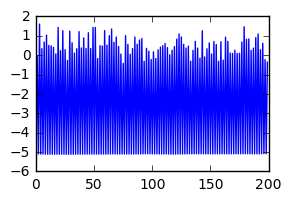

    After 100 iterations
        Discriminator Loss                         = 0.512223303318
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.665942132473
254


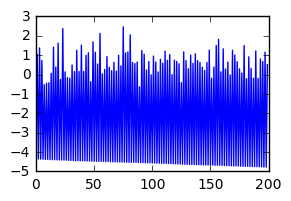

    After 100 iterations
        Discriminator Loss                         = -0.157504156232
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.199498295784
255


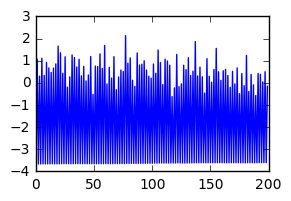

    After 100 iterations
        Discriminator Loss                         = -0.23267224431
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.202858582139
256


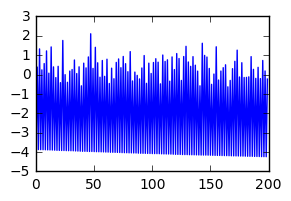

    After 100 iterations
        Discriminator Loss                         = 0.743712961674
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.922857642174
257


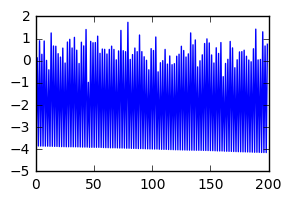

    After 100 iterations
        Discriminator Loss                         = 0.726286113262
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.675821661949
258


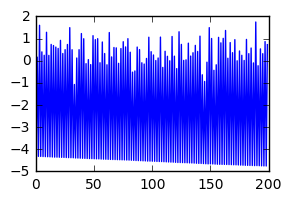

    After 100 iterations
        Discriminator Loss                         = 0.668690025806
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.200297191739
259


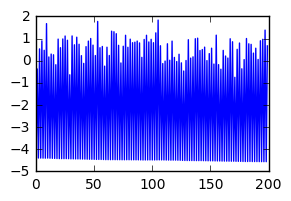

    After 100 iterations
        Discriminator Loss                         = -0.353212893009
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.243898674846
260


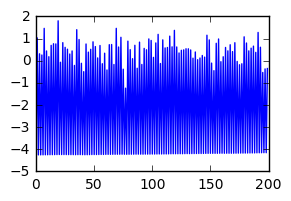

    After 100 iterations
        Discriminator Loss                         = 1.07824981213
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.340865820646
261


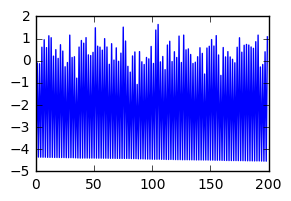

    After 100 iterations
        Discriminator Loss                         = -0.275218874216
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.386440217495
262


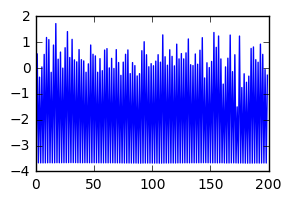

    After 100 iterations
        Discriminator Loss                         = -0.469082802534
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.88791179657
263


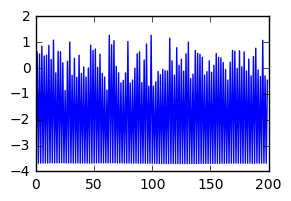

    After 100 iterations
        Discriminator Loss                         = 0.406617641449
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.0438747666776
264


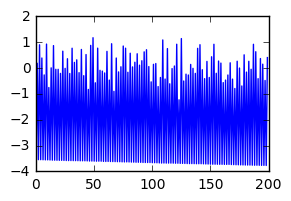

    After 100 iterations
        Discriminator Loss                         = 0.0164475850761
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.185682311654
265


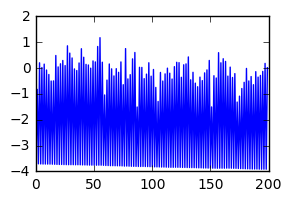

    After 100 iterations
        Discriminator Loss                         = -0.172417268157
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.510980188847
266


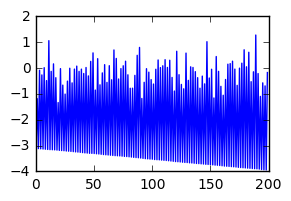

    After 100 iterations
        Discriminator Loss                         = -0.0239709876478
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.412458777428
267


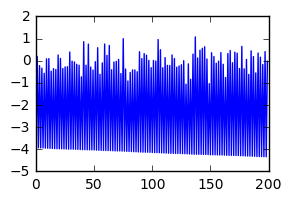

    After 100 iterations
        Discriminator Loss                         = -0.50836867094
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.906728208065
268


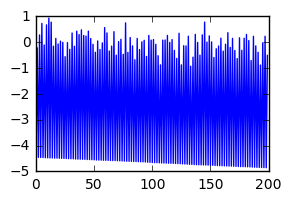

    After 100 iterations
        Discriminator Loss                         = -0.150943666697
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.290494948626
269


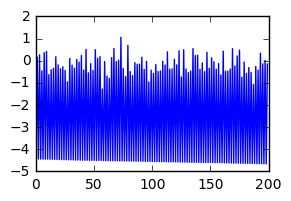

    After 100 iterations
        Discriminator Loss                         = 0.287834972143
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.0250577386469
270


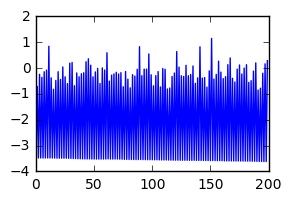

    After 100 iterations
        Discriminator Loss                         = 0.262641519308
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.381198257208
271


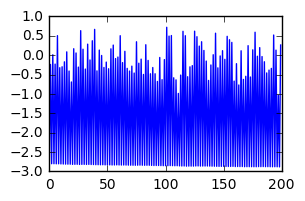

    After 100 iterations
        Discriminator Loss                         = -0.578595995903
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.090292185545
272


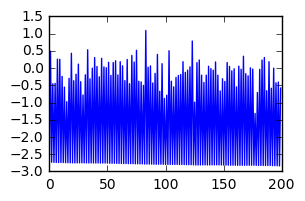

    After 100 iterations
        Discriminator Loss                         = 0.593751549721
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.603514611721
273


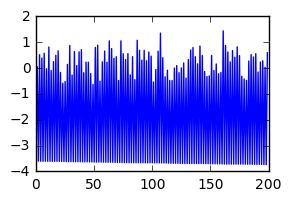

    After 100 iterations
        Discriminator Loss                         = 0.328640729189
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.682168900967
274


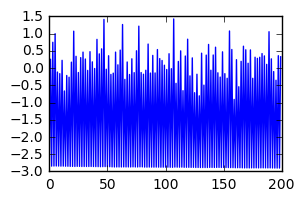

    After 100 iterations
        Discriminator Loss                         = 0.508568882942
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: 0.127596572042
275
     Level #0 Epoch #0 Batch #275


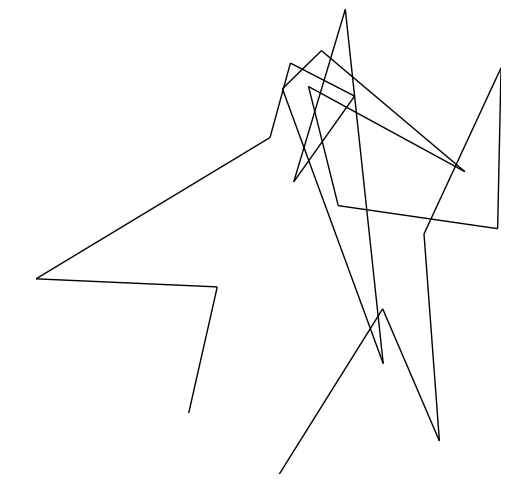

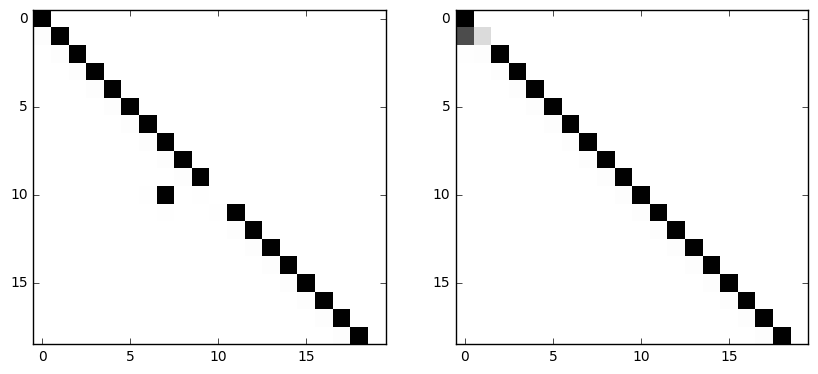

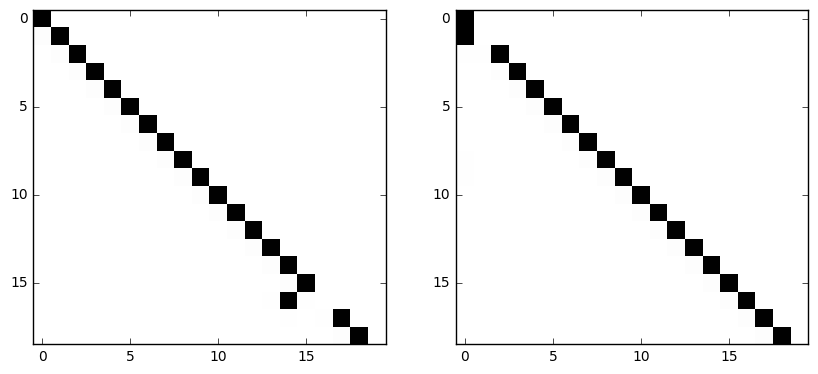

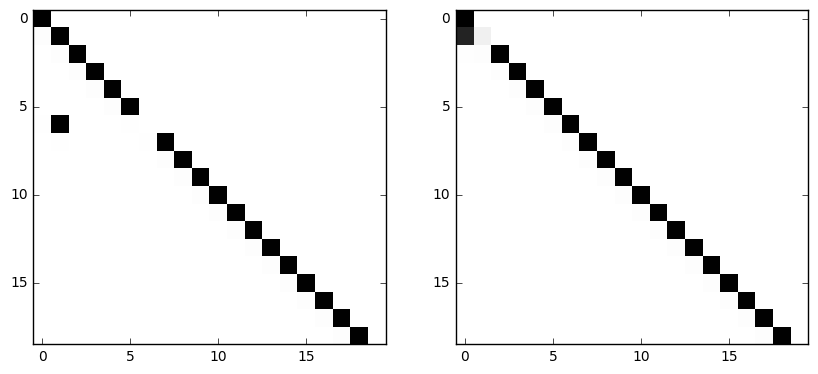

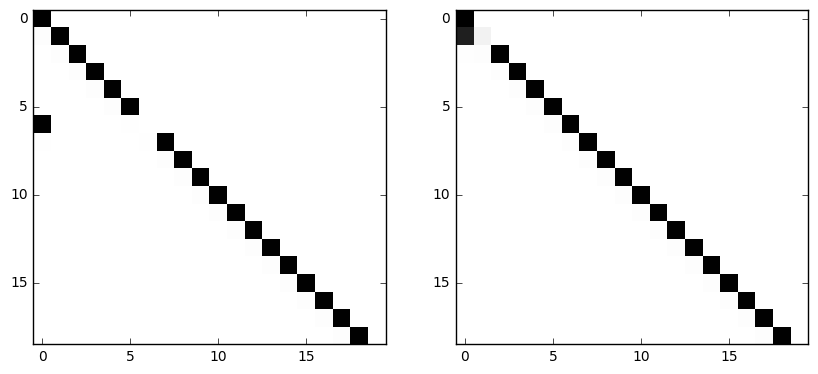

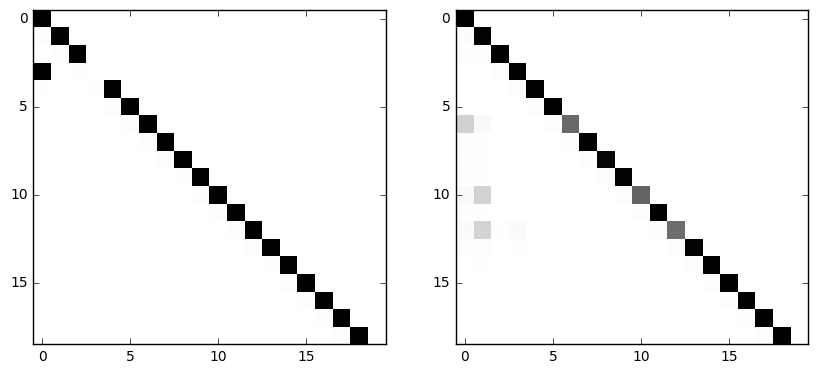

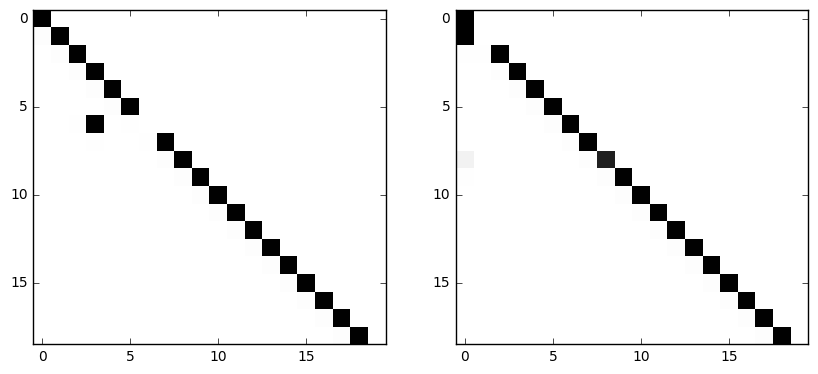

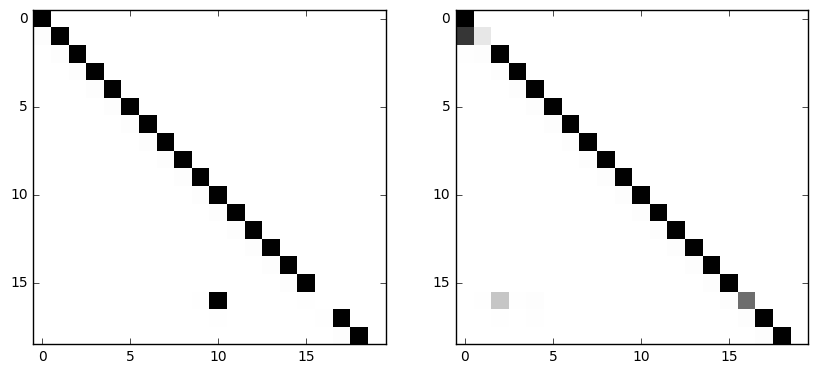

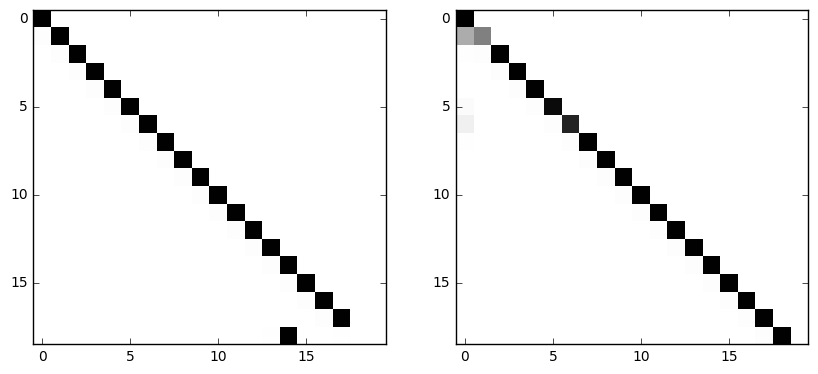

    After 100 iterations
        Discriminator Loss                         = 1.11338663101
(16, 1, 100)
(16, 1, 1)

    Generator_Loss: -0.376672923565
276


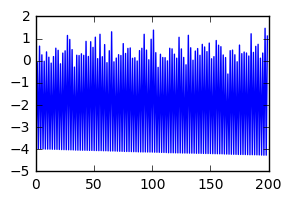

KeyboardInterrupt: 

In [6]:
geom_model, cond_geom_model, morph_model, cond_morph_model, disc_model, gan_model = \
    train.train_model(training_data=training_data,
                      n_levels=n_levels,
                      n_nodes=n_nodes,
                      input_dim=input_dim,
                      n_epochs=n_epochs,
                      batch_size=batch_size,
                      n_batch_per_epoch=n_batch_per_epoch,
                      d_iters=d_iters,
                      lr_discriminator=lr_discriminator,
                      lr_generator=lr_generator,
                      weight_constraint=weight_constraint,
                      rule=rule,
                      train_one_by_one=train_one_by_one,
                      train_loss=train_loss,
                      verbose=True)

In [ ]:
level=0
g_model = geom_model[level]
m_model = morph_model[level]
cg_model = geom_model[level]
cm_model = geom_model[level]
d_model = disc_model[level]
stacked_model = gan_model[level]

In [ ]:
d_model.trainable = False
stacked_model.get_config()

In [ ]:
stacked_model.summary()

In [ ]:
noise_code = np.random.randn(1,1,100)

if rule == 'gmd':
    locations_gen = geom_model[0].predict(noise_code)
    softmax_gen = np.squeeze(cond_morph_model[0].predict([noise_code, locations_gen]))
elif rule == 'mgd':
    softmax_gen = morph_model[0].predict(noise_code)
    locations_gen = cond_geom_model[0].predict([noise_code, softmax_gen])
    softmax_gen = np.squeeze(softmax_gen)

In [ ]:
plt.imshow(softmax_gen, interpolation='none', cmap='Greys')
plt.colorbar()
plt.show()

In [ ]:
neuron_object = train.plot_example_neuron(locations_gen, softmax_gen)
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)

In [ ]:
plt.plot(softmax_gen.argmax(axis=1))
plt.ylim([0, 20])
plt.show()

In [ ]:
neuron_object.parent_index

In [ ]:
McNeuron.visualize.plot_dedrite_tree(neuron_object)

In [ ]:
print np.max(training_data['geometry']['n20'][0, :, :]), np.min(training_data['geometry']['n20'][0, :, :])
print locations_gen.max(), locations_gen.min()

In [ ]:
neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
neuron_object.fit()
features = neuron_object.features
features.keys()

In [ ]:
import pprint as pp
pp.pprint(features['branch_angle_segment'])

In [ ]:
for ex in range(2200, 2300):
    input_code = dict()
    input_code['morphology'] = training_data['morphology']['n20'][ex, :]
    input_code['geometry'] = np.squeeze(training_data['geometry']['n20'][ex, :, :])
    neuron_object = data_transforms.make_swc_from_prufer_and_locations(input_code)
    neuron_object = McNeuron.Neuron(file_format='only list of nodes', input_file = neuron_object.nodes_list)
    McNeuron.visualize.plot_2D(neuron_object)
    McNeuron.visualize.plot_dedrite_tree(neuron_object)
    plt.show()
    plt.plot(training_data['morphology']['n20'][ex, :])
    plt.show()